<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: darkslategray;
           font-size:110%;
           letter-spacing:0.6px">

<h2 style="padding: 30px;
              color:snow;"> Practica 1: Sensado y análisis de audio

</h2>
</div>

<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: lightsteelblue;
           font-size:90%;
           letter-spacing:0.6px">

<h2 style="padding: 10px;
              color:white;"> Roxana Rachel Valencia Ortega

</h2>
</div>

In [1]:
from IPython.display import Image

In [2]:
url_de_la_imagen = 'https://img.freepik.com/premium-photo/robot-man-talking-each-other_843415-480.jpg'
Image(url=url_de_la_imagen)

<center>
<div style="color:;
           display:fill;
           border-radius:1px;
           background-color: darkcyan;
           font-size:110%;
           letter-spacing:0.3px">

<h2 style="padding: 10px;
              color:snow;"> Bibliotecas

</h2>
</div>

In [3]:
pip install librosa pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install soundfile

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pydub

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install --upgrade soundfile


Note: you may need to restart the kernel to use updated packages.



<center>
<div style="color:;
           display:fill;
           border-radius:1px;
           background-color: lightseagreen;
           font-size:110%;
           letter-spacing:0.3px">

<h2 style="padding: 20px;
              color:white;"> Análisis Experimental
</h2>
</div> 

In [8]:
import os
import pandas as pd
import re

RAVD = "/Users/roxanarachel/Desktop/AUDIOS1.1"

# Obtener la lista de archivos en la ruta
files_in_directory = os.listdir(RAVD)

# Filtrar solo los archivos con extensión .wav
wav_files = [file for file in files_in_directory if file.lower().endswith(".wav")]

# Listas para almacenar información
emotion = []
gender = []
path = []
real_or_artificial = []

# Expresión regular para extraer información
pattern = re.compile(r'\d+')

# Iterar sobre los archivos WAV
for wav_file in wav_files:
    # Construir la ruta completa del archivo
    file_path = os.path.join(RAVD, wav_file)
    
    # Obtener información del nombre del archivo usando expresión regular
    numbers = pattern.findall(wav_file)
    
    # Asegurarse de que haya al menos un número
    if numbers:
        emotion.append(int(numbers[0]))
        temp = int(numbers[0])
        gender.append("female" if temp % 2 == 0 else "male")
        real_or_artificial.append("real" if temp % 2 == 0 else "artificial")
        path.append(file_path)

# Crear el DataFrame
RAVD_df = pd.DataFrame({'path': path, 'emotion': emotion, 'gender': gender, 'real_or_artificial': real_or_artificial})
RAVD_df['labels'] = RAVD_df['gender'] + '_' + RAVD_df['emotion'].astype(str)
RAVD_df['source'] = 'RAVDESS'  

# Visualizar el DataFrame
pd.set_option('display.max_rows', None)  # Para mostrar todas las filas
print(RAVD_df)

# Mostrar las emociones únicas presentes en el DataFrame
unique_emotions = RAVD_df['emotion'].unique()
print("Emociones presentes en el DataFrame:")
print(unique_emotions)


                                                  path  emotion  gender  \
0    /Users/roxanarachel/Desktop/AUDIOS1.1/JUAN-ART...       13    male   
1    /Users/roxanarachel/Desktop/AUDIOS1.1/JESUS-RE...        8  female   
2    /Users/roxanarachel/Desktop/AUDIOS1.1/RACHEL-A...       18  female   
3    /Users/roxanarachel/Desktop/AUDIOS1.1/JESUS-RE...        9    male   
4    /Users/roxanarachel/Desktop/AUDIOS1.1/RACHEL-A...       19    male   
5    /Users/roxanarachel/Desktop/AUDIOS1.1/ARIANA-R...        5    male   
6    /Users/roxanarachel/Desktop/AUDIOS1.1/DAFNE-AR...       20  female   
7    /Users/roxanarachel/Desktop/AUDIOS1.1/JUAN-ART...       10  female   
8    /Users/roxanarachel/Desktop/AUDIOS1.1/RACHEL-R...        2  female   
9    /Users/roxanarachel/Desktop/AUDIOS1.1/JUAN-ART...       11    male   
10   /Users/roxanarachel/Desktop/AUDIOS1.1/DAFNE-AR...       13    male   
11   /Users/roxanarachel/Desktop/AUDIOS1.1/ARIANA-R...        2  female   
12   /Users/roxanarachel/

In [9]:
import pandas as pd
from pydub import AudioSegment

# Supongamos que ya tienes definido el DataFrame RAVD_df
# ...

# Función para recortar el audio y guardar el archivo recortado
def recortar_audio(file_path, duration=3):
    try:
        audio = AudioSegment.from_file(file_path)
        audio_recortado = audio[:duration * 1000]  # Convertir segundos a milisegundos

        # Obtener la ruta y el nombre del archivo sin la extensión
        file_name, _ = os.path.splitext(os.path.basename(file_path))

        nuevo_path = f"{file_name}_recortado.wav"  # Agregar '_recortado' al nombre del archivo
        audio_recortado.export(nuevo_path, format="wav")
        return nuevo_path
    except Exception as e:
        print(f"Error al recortar {file_path}: {e}")
        return None

# Aplicar la función a cada fila del DataFrame y obtener las nuevas rutas recortadas
RAVD_df['path_recortado'] = RAVD_df['path'].apply(lambda path: recortar_audio(path, duration=3))

# Visualizar las nuevas rutas recortadas
pd.set_option('display.max_rows', None)  # Para mostrar todas las filas
print(RAVD_df[['path', 'path_recortado']])


                                                  path  \
0    /Users/roxanarachel/Desktop/AUDIOS1.1/JUAN-ART...   
1    /Users/roxanarachel/Desktop/AUDIOS1.1/JESUS-RE...   
2    /Users/roxanarachel/Desktop/AUDIOS1.1/RACHEL-A...   
3    /Users/roxanarachel/Desktop/AUDIOS1.1/JESUS-RE...   
4    /Users/roxanarachel/Desktop/AUDIOS1.1/RACHEL-A...   
5    /Users/roxanarachel/Desktop/AUDIOS1.1/ARIANA-R...   
6    /Users/roxanarachel/Desktop/AUDIOS1.1/DAFNE-AR...   
7    /Users/roxanarachel/Desktop/AUDIOS1.1/JUAN-ART...   
8    /Users/roxanarachel/Desktop/AUDIOS1.1/RACHEL-R...   
9    /Users/roxanarachel/Desktop/AUDIOS1.1/JUAN-ART...   
10   /Users/roxanarachel/Desktop/AUDIOS1.1/DAFNE-AR...   
11   /Users/roxanarachel/Desktop/AUDIOS1.1/ARIANA-R...   
12   /Users/roxanarachel/Desktop/AUDIOS1.1/JUAN-ART...   
13   /Users/roxanarachel/Desktop/AUDIOS1.1/ANDRES-R...   
14   /Users/roxanarachel/Desktop/AUDIOS1.1/JUAN-ART...   
15   /Users/roxanarachel/Desktop/AUDIOS1.1/DAFNE-AR...   
16   /Users/ro

In [10]:
import pandas as pd
from pydub import AudioSegment
import os

# Supongamos que ya tienes definido el DataFrame RAVD_df
# ...

# Asegurarse de que la columna 'emocion_descriptiva' existe
if 'emocion_descriptiva' not in RAVD_df.columns:
    # Si no existe, crea la columna utilizando el mapeo de emociones
    emociones_mapping = {
        1: 'neutral',
        2: 'happy',
        3: 'sad',
        4: 'angry',
        5: 'fear',
        6: 'disgust',
        7: 'surprise'
    }
    RAVD_df['emocion_descriptiva'] = RAVD_df['emotion'].map(emociones_mapping)

# Función para recortar el audio y guardar el archivo recortado
def recortar_audio(file_path, duration=3):
    try:
        audio = AudioSegment.from_file(file_path)
        audio_recortado = audio[:duration * 1000]  # Convertir segundos a milisegundos

        # Obtener la ruta y el nombre del archivo sin la extensión
        file_name, _ = os.path.splitext(os.path.basename(file_path))

        nuevo_path = f"{file_name}_recortado.wav"  # Agregar '_recortado' al nombre del archivo
        audio_recortado.export(nuevo_path, format="wav")
        return nuevo_path
    except Exception as e:
        print(f"Error al recortar {file_path}: {e}")
        return None

# Crear un nuevo DataFrame con las columnas deseadas
columnas_deseadas = ['path', 'emotion', 'gender', 'real_or_artificial', 'labels', 'source', 'emocion_descriptiva', 'path_recortado']
RAVD_df_recortado = RAVD_df[columnas_deseadas]

# Visualizar las nuevas rutas recortadas
pd.set_option('display.max_rows', None)  # Para mostrar todas las filas
print(RAVD_df_recortado)




                                                  path  emotion  gender  \
0    /Users/roxanarachel/Desktop/AUDIOS1.1/JUAN-ART...       13    male   
1    /Users/roxanarachel/Desktop/AUDIOS1.1/JESUS-RE...        8  female   
2    /Users/roxanarachel/Desktop/AUDIOS1.1/RACHEL-A...       18  female   
3    /Users/roxanarachel/Desktop/AUDIOS1.1/JESUS-RE...        9    male   
4    /Users/roxanarachel/Desktop/AUDIOS1.1/RACHEL-A...       19    male   
5    /Users/roxanarachel/Desktop/AUDIOS1.1/ARIANA-R...        5    male   
6    /Users/roxanarachel/Desktop/AUDIOS1.1/DAFNE-AR...       20  female   
7    /Users/roxanarachel/Desktop/AUDIOS1.1/JUAN-ART...       10  female   
8    /Users/roxanarachel/Desktop/AUDIOS1.1/RACHEL-R...        2  female   
9    /Users/roxanarachel/Desktop/AUDIOS1.1/JUAN-ART...       11    male   
10   /Users/roxanarachel/Desktop/AUDIOS1.1/DAFNE-AR...       13    male   
11   /Users/roxanarachel/Desktop/AUDIOS1.1/ARIANA-R...        2  female   
12   /Users/roxanarachel/

In [11]:
pip install --upgrade soundfile


Note: you may need to restart the kernel to use updated packages.


/var/folders/pp/wmccm1s10r7fdx87b695vhqw0000gn/T/ipykernel_8751/332146804.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=RAVD_df_recortado, x="labels", palette=custom_palette)
/var/folders/pp/wmccm1s10r7fdx87b695vhqw0000gn/T/ipykernel_8751/332146804.py:6: UserWarning: 
The palette list has fewer values (6) than needed (56) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=RAVD_df_recortado, x="labels", palette=custom_palette)


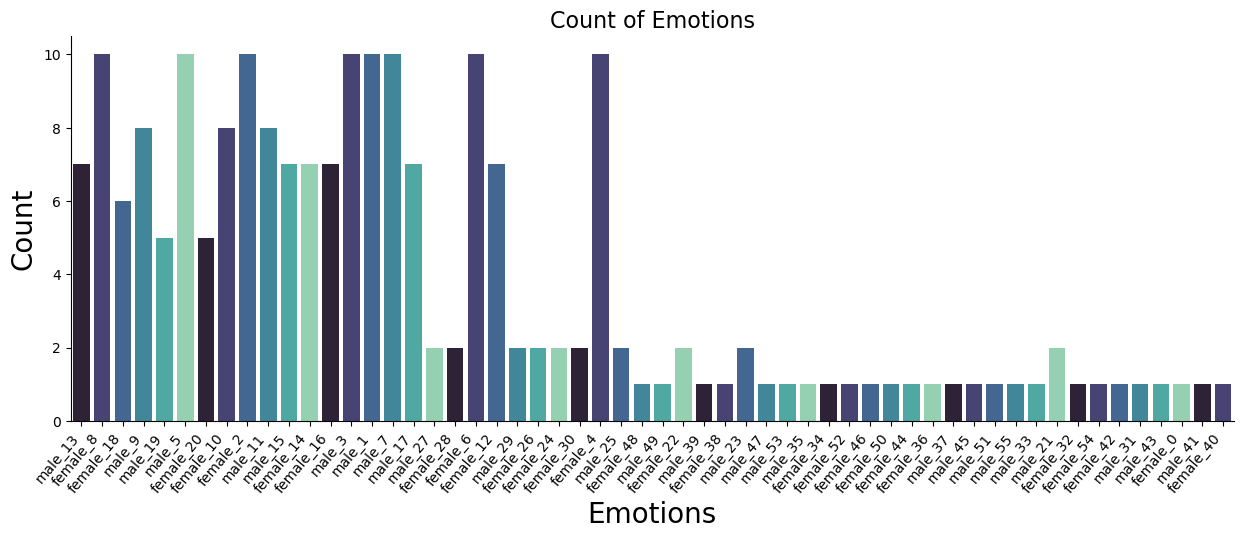

In [12]:
# Definir una paleta de colores personalizada
custom_palette = sns.color_palette("mako")  # Puedes cambiar "pastel" por cualquier otra paleta de colores de Seaborn

plt.figure(figsize=(15, 5))
plt.title('Count of Emotions', size=16)
sns.countplot(data=RAVD_df_recortado, x="labels", palette=custom_palette)
plt.xlabel('Emotions', size=20)
plt.ylabel('Count', size=20)
plt.xticks(rotation=50, ha="right")  # Añadido para ajustar las etiquetas en el eje x
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()


/var/folders/pp/wmccm1s10r7fdx87b695vhqw0000gn/T/ipykernel_8751/1414796180.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=RAVD_df, x="emocion_descriptiva", palette=custom_palette)  # Cambiado a "emocion_descriptiva"
/var/folders/pp/wmccm1s10r7fdx87b695vhqw0000gn/T/ipykernel_8751/1414796180.py:6: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=RAVD_df, x="emocion_descriptiva", palette=custom_palette)  # Cambiado a "emocion_descriptiva"


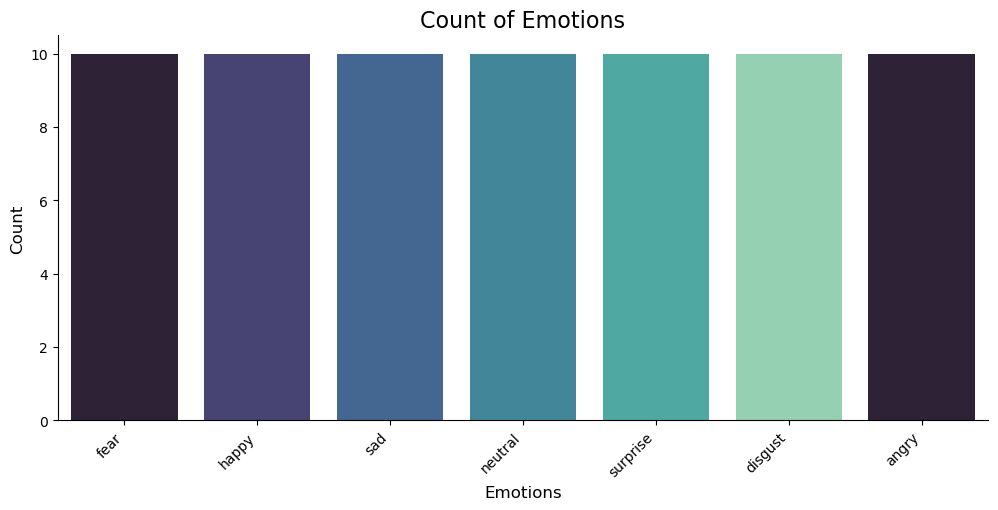

In [13]:
# Definir una paleta de colores personalizada (puedes cambiar "mako" por otra paleta de colores de Seaborn)
custom_palette = sns.color_palette("mako")

plt.figure(figsize=(12, 5))
plt.title('Count of Emotions', size=16)
sns.countplot(data=RAVD_df, x="emocion_descriptiva", palette=custom_palette)  # Cambiado a "emocion_descriptiva"
plt.xlabel('Emotions', size=12)
plt.ylabel('Count', size=12)
plt.xticks(rotation=45, ha="right")  # Añadido para ajustar las etiquetas en el eje x
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()



<center>
<div style="color:;
           display:fill;
           border-radius:1px;
           background-color: mediumturquoise;
           font-size:110%;
           letter-spacing:0.3px">

<h2 style="padding: 20px;
              color:white;"> MFCC
</h2>
</div> 

Este código realiza el procesamiento de características de Mel-frequency cepstral coefficients (MFCC) para archivos de audio en un DataFrame llamado RAVD_df_recortado.

In [14]:
pip install resampy

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install librosa resampy


Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install --upgrade resampy librosa

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install numpy scipy numba scikit-learn audioread

Note: you may need to restart the kernel to use updated packages.


## Extracción de Derivadas de Coeficientes MFCC

## MFCC - features

In [18]:
import pandas as pd
import librosa

# Definir la función para extraer características de MFCC
def extract_mfcc_features(file_path):
    try:
        # Cargar el archivo de audio recortado
        audio, _ = librosa.load(file_path, res_type='kaiser_fast')

        # Extraer características de MFCC
        mfccs = librosa.feature.mfcc(y=audio, sr=22050, n_mfcc=13)

        # Tomar la media de los coeficientes MFCC a lo largo del tiempo
        mfccs_mean = mfccs.mean(axis=1)

        return mfccs_mean
    except Exception as e:
        print(f"Error al procesar {file_path}: {e}")
        return None

# Aplicar la función a cada fila del DataFrame recortado y agregar las características de MFCC como nuevas columnas
RAVD_df_recortado.loc[:, 'mfcc_features'] = RAVD_df_recortado['path_recortado'].apply(extract_mfcc_features)

# Visualizar el DataFrame recortado con las nuevas columnas de características de MFCC
pd.set_option('display.max_colwidth', None)  # Mostrar toda la información de las columnas
print("DataFrame Recortado:")
print(RAVD_df_recortado[['path_recortado', 'mfcc_features']])

# Calcular el promedio de las 13 características de MFCC para todo el DataFrame
mfcc_average = RAVD_df_recortado['mfcc_features'].mean()

# Crear un DataFrame con el promedio de las 13 características de MFCC
average_df = pd.DataFrame([mfcc_average], columns=[f'mfcc_{i}' for i in range(13)])

# Visualizar el DataFrame con el promedio de las 13 características de MFCC
print("\nDataFrame con Promedio de Características MFCC:")
print(average_df)

# Guardar ambos DataFrames en archivos CSV
RAVD_df_recortado.to_csv('DataFrame_Recortado.csv', index=False)
average_df.to_csv('DataFrame_Promedio_MFCC.csv', index=False)


DataFrame Recortado:
                                  path_recortado  \
0        JUAN-ARTIFICIAL-HOMBRE_13_recortado.wav   
1             JESUS-REAL-HOMBRE_08_recortado.wav   
2      RACHEL-ARTIFICIAL-HOMBRE_18_recortado.wav   
3             JESUS-REAL-HOMBRE_09_recortado.wav   
4      RACHEL-ARTIFICIAL-HOMBRE_19_recortado.wav   
5             ARIANA-REAL-HOMBRE_5_recortado.wav   
6        DAFNE-ARTIFICIAL-MUJER_20_recortado.wav   
7        JUAN-ARTIFICIAL-HOMBRE_10_recortado.wav   
8            RACHEL-REAL-HOMBRE_02_recortado.wav   
9        JUAN-ARTIFICIAL-HOMBRE_11_recortado.wav   
10      DAFNE-ARTIFICIAL-HOMBRE_13_recortado.wav   
11            ARIANA-REAL-HOMBRE_2_recortado.wav   
12       JUAN-ARTIFICIAL-HOMBRE_15_recortado.wav   
13            ANDRES-REAL-MUJER_10_recortado.wav   
14       JUAN-ARTIFICIAL-HOMBRE_14_recortado.wav   
15      DAFNE-ARTIFICIAL-HOMBRE_16_recortado.wav   
16       DAFNE-ARTIFICIAL-MUJER_18_recortado.wav   
17            ARIANA-REAL-HOMBRE_3_recortad

/var/folders/pp/wmccm1s10r7fdx87b695vhqw0000gn/T/ipykernel_8751/793793564.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RAVD_df_recortado.loc[:, 'mfcc_features'] = RAVD_df_recortado['path_recortado'].apply(extract_mfcc_features)


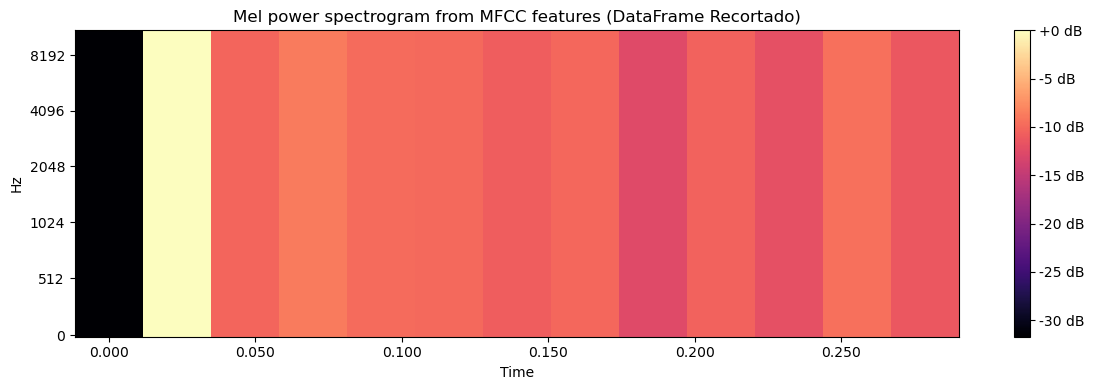

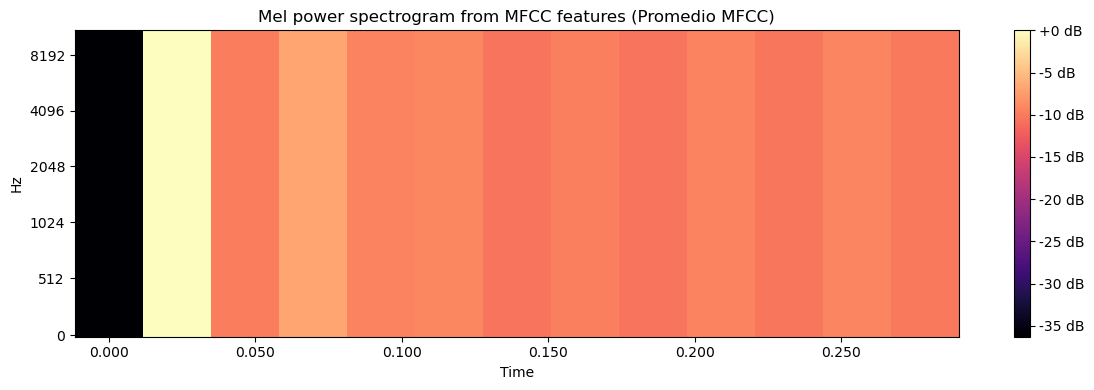

In [19]:
import librosa.display
import matplotlib.pyplot as plt

# Elegir un archivo específico del DataFrame recortado
sample_row = RAVD_df_recortado.iloc[0]

# Cargar las características de MFCC del archivo seleccionado
mfcc_features = sample_row['mfcc_features']

# Asegurarse de que las características MFCC tengan la forma correcta (n_mfcc, time)
if len(mfcc_features.shape) == 1:
    # Si solo tenemos una fila, expandir dimensiones
    mfcc_features = mfcc_features[np.newaxis, :]

# Calcular el espectrograma mel a partir de las características de MFCC
S = librosa.feature.inverse.mfcc_to_mel(mfcc_features)

# Convertir a escala de logaritmo (dB) utilizando el máximo como referencia
log_S = librosa.power_to_db(S, ref=np.max)

# Visualizar el espectrograma mel del DataFrame recortado
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram from MFCC features (DataFrame Recortado)')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()

# Calcular el espectrograma mel a partir del promedio de las características de MFCC
S_avg = librosa.feature.inverse.mfcc_to_mel(np.expand_dims(mfcc_average, axis=0))

# Convertir a escala de logaritmo (dB) utilizando el máximo como referencia
log_S_avg = librosa.power_to_db(S_avg, ref=np.max)

# Visualizar el espectrograma mel del promedio de las características de MFCC
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S_avg, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram from MFCC features (Promedio MFCC)')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()


In [20]:
pip install librosa matplotlib

Note: you may need to restart the kernel to use updated packages.


### Delta y Delta2 

In [21]:
def extract_delta_mfcc_features(file_path):
    try:
        # Cargar el archivo de audio
        audio, _ = librosa.load(file_path, res_type='kaiser_fast')

        # Extraer características de MFCC
        mfccs = librosa.feature.mfcc(y=audio, sr=22050, n_mfcc=13)

        # Calcular derivadas de los coeficientes MFCC
        delta_mfccs = librosa.feature.delta(mfccs)
        delta2_mfccs = librosa.feature.delta(mfccs, order=2)

        # Tomar la media de las derivadas de los coeficientes MFCC
        delta_mfccs_mean = delta_mfccs.mean(axis=1)
        delta2_mfccs_mean = delta2_mfccs.mean(axis=1)

        return delta_mfccs_mean, delta2_mfccs_mean

    except Exception as e:
        print(f"Error al procesar {file_path}: {e}")
        return None, None

# Aplicar la función a cada fila del DataFrame recortado y agregar las características como nuevas columnas
RAVD_df_recortado[['delta_mfcc_features', 'delta2_mfcc_features']] = RAVD_df_recortado['path_recortado'].apply(extract_delta_mfcc_features).apply(pd.Series)

# Visualizar el DataFrame recortado con las características de delta MFCC
print("DataFrame recortado con características de delta MFCC:")
print(RAVD_df_recortado[['path_recortado', 'delta_mfcc_features', 'delta2_mfcc_features']])

# Puedes acceder a las características de un archivo específico de la siguiente manera:
# Obtener las características de un archivo específico (por ejemplo, el primer archivo en el DataFrame recortado)
sample_delta_mfcc_features = RAVD_df_recortado[['delta_mfcc_features', 'delta2_mfcc_features']]
# Imprimir las características
print("\nCaracterísticas de delta MFCC de todos los archivos recortados:")
print(sample_delta_mfcc_features)


DataFrame recortado con características de delta MFCC:
                                  path_recortado  \
0        JUAN-ARTIFICIAL-HOMBRE_13_recortado.wav   
1             JESUS-REAL-HOMBRE_08_recortado.wav   
2      RACHEL-ARTIFICIAL-HOMBRE_18_recortado.wav   
3             JESUS-REAL-HOMBRE_09_recortado.wav   
4      RACHEL-ARTIFICIAL-HOMBRE_19_recortado.wav   
5             ARIANA-REAL-HOMBRE_5_recortado.wav   
6        DAFNE-ARTIFICIAL-MUJER_20_recortado.wav   
7        JUAN-ARTIFICIAL-HOMBRE_10_recortado.wav   
8            RACHEL-REAL-HOMBRE_02_recortado.wav   
9        JUAN-ARTIFICIAL-HOMBRE_11_recortado.wav   
10      DAFNE-ARTIFICIAL-HOMBRE_13_recortado.wav   
11            ARIANA-REAL-HOMBRE_2_recortado.wav   
12       JUAN-ARTIFICIAL-HOMBRE_15_recortado.wav   
13            ANDRES-REAL-MUJER_10_recortado.wav   
14       JUAN-ARTIFICIAL-HOMBRE_14_recortado.wav   
15      DAFNE-ARTIFICIAL-HOMBRE_16_recortado.wav   
16       DAFNE-ARTIFICIAL-MUJER_18_recortado.wav   
17       

/var/folders/pp/wmccm1s10r7fdx87b695vhqw0000gn/T/ipykernel_8751/633086639.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RAVD_df_recortado[['delta_mfcc_features', 'delta2_mfcc_features']] = RAVD_df_recortado['path_recortado'].apply(extract_delta_mfcc_features).apply(pd.Series)
/var/folders/pp/wmccm1s10r7fdx87b695vhqw0000gn/T/ipykernel_8751/633086639.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RAVD_df_recortado[['delta_mfcc_features', 'delta2_mfcc_features']] = RAVD_df_recortado['path_recortad

In [22]:
import pandas as pd
import librosa
import numpy as np

# Definir la función para extraer características de delta MFCC
def extract_delta_mfcc_features(file_path):
    try:
        # Cargar el archivo de audio
        audio, _ = librosa.load(file_path, res_type='kaiser_fast')

        # Extraer características de MFCC
        mfccs = librosa.feature.mfcc(y=audio, sr=22050, n_mfcc=13)

        # Calcular derivadas de los coeficientes MFCC
        delta_mfccs = librosa.feature.delta(mfccs)
        delta2_mfccs = librosa.feature.delta(mfccs, order=2)

        # Tomar la media de las derivadas de los coeficientes MFCC
        delta_mfccs_mean = delta_mfccs.mean(axis=1)
        delta2_mfccs_mean = delta2_mfccs.mean(axis=1)

        return delta_mfccs_mean, delta2_mfccs_mean

    except Exception as e:
        print(f"Error al procesar {file_path}: {e}")
        return None, None

# Crear una copia del DataFrame para evitar SettingWithCopyWarning
RAVD_df_recortado = RAVD_df_recortado.copy()

# Aplicar la función a cada fila del DataFrame recortado y agregar las características como nuevas columnas
features_df = RAVD_df_recortado['path_recortado'].apply(extract_delta_mfcc_features).apply(pd.Series)

# Asignar las nuevas columnas al DataFrame original
RAVD_df_recortado[['delta_mfcc_features', 'delta2_mfcc_features']] = features_df

# Calcular el promedio de las 13 características para todos los archivos
delta_mfcc_average = RAVD_df_recortado['delta_mfcc_features'].mean(axis=0)
delta2_mfcc_average = RAVD_df_recortado['delta2_mfcc_features'].mean(axis=0)

# Crear un DataFrame con el promedio de las 13 características de delta MFCC
delta_mfcc_average_df = pd.DataFrame([delta_mfcc_average], columns=[f'delta_mfcc_{i}' for i in range(13)])
delta2_mfcc_average_df = pd.DataFrame([delta2_mfcc_average], columns=[f'delta2_mfcc_{i}' for i in range(13)])

# Visualizar los DataFrames con el promedio de las características de delta MFCC
print("\nDataFrame con Promedio de Características de delta MFCC:")
print(delta_mfcc_average_df)

print("\nDataFrame con Promedio de Características de delta2 MFCC:")
print(delta2_mfcc_average_df)

# Guardar ambos DataFrames en archivos CSV
RAVD_df_recortado.to_csv('DataFrame_Recortado.csv', index=False)
delta_mfcc_average_df.to_csv('DataFrame_Promedio_Delta_MFCC.csv', index=False)
delta2_mfcc_average_df.to_csv('DataFrame_Promedio_Delta2_MFCC.csv', index=False)



DataFrame con Promedio de Características de delta MFCC:
   delta_mfcc_0  delta_mfcc_1  delta_mfcc_2  delta_mfcc_3  delta_mfcc_4  \
0      2.404461      0.724249     -0.071412      0.168684     -0.025052   

   delta_mfcc_5  delta_mfcc_6  delta_mfcc_7  delta_mfcc_8  delta_mfcc_9  \
0     -0.023003     -0.119489      -0.04018      -0.12524     -0.023023   

   delta_mfcc_10  delta_mfcc_11  delta_mfcc_12  
0      -0.090849      -0.003291      -0.074545  

DataFrame con Promedio de Características de delta2 MFCC:
   delta2_mfcc_0  delta2_mfcc_1  delta2_mfcc_2  delta2_mfcc_3  delta2_mfcc_4  \
0      -0.326105      -0.181223       0.016089      -0.061551       0.009118   

   delta2_mfcc_5  delta2_mfcc_6  delta2_mfcc_7  delta2_mfcc_8  delta2_mfcc_9  \
0       0.004453       0.015931       0.006714       0.033162       0.006479   

   delta2_mfcc_10  delta2_mfcc_11  delta2_mfcc_12  
0        0.026517         -0.0045        0.011185  


NameError: name 'ipd' is not defined

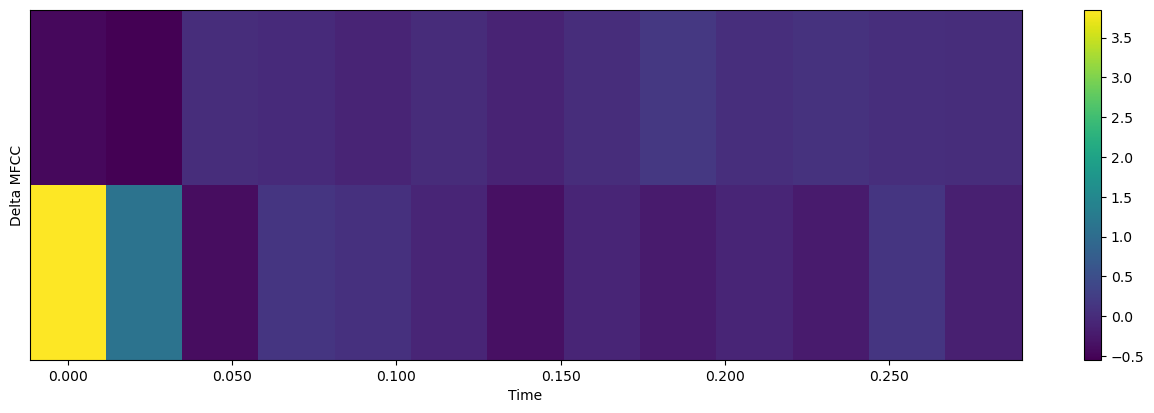

In [24]:
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

# Elegir un archivo específico del DataFrame recortado
sample_row = RAVD_df_recortado.iloc[0]

# Cargar las características de delta MFCC del archivo seleccionado
delta_mfcc_features = sample_row['delta_mfcc_features']
delta2_mfcc_features = sample_row['delta2_mfcc_features']

# Verificar la longitud de los arrays
if len(delta_mfcc_features) == 0 or len(delta2_mfcc_features) == 0:
    print("Los arrays están vacíos. Verifica las cadenas de texto.")
else:
    # Crear un array que contenga las características de delta MFCC
    delta_mfcc_array = np.vstack((delta_mfcc_features, delta2_mfcc_features))

    # Crear la gráfica
    plt.figure(figsize=(16, 10))

    # Gráfica de las características de delta MFCC
    plt.subplot(2, 1, 1)  # Se redujo a 2 filas para una visualización adecuada
    librosa.display.specshow(delta_mfcc_array, x_axis='time', cmap='viridis')
    plt.ylabel('Delta MFCC')
    plt.colorbar()

    # Reproducir el audio correspondiente
    path_recortado = sample_row['path_recortado']
    ipd.Audio(path_recortado)
    plt.show()


In [25]:
from IPython.display import Audio

In [26]:
pip install librosa matplotlib pandas


Note: you may need to restart the kernel to use updated packages.


In [27]:
import IPython.display as ipd

<center>
<div style="color:;
           display:fill;
           border-radius:1px;
           background-color: teal;
           font-size:110%;
           letter-spacing:0.3px">

<h2 style="padding: 20px;
              color:white;"> Inspección de datos
</h2>
</div> 

In [29]:
df = pd.read_csv(r'DataFrame_Recortado.csv', index_col=False,)
print(df)

                                                                        path  \
0        /Users/roxanarachel/Desktop/AUDIOS1.1/JUAN-ARTIFICIAL-HOMBRE_13.wav   
1             /Users/roxanarachel/Desktop/AUDIOS1.1/JESUS-REAL-HOMBRE_08.wav   
2      /Users/roxanarachel/Desktop/AUDIOS1.1/RACHEL-ARTIFICIAL-HOMBRE_18.wav   
3             /Users/roxanarachel/Desktop/AUDIOS1.1/JESUS-REAL-HOMBRE_09.wav   
4      /Users/roxanarachel/Desktop/AUDIOS1.1/RACHEL-ARTIFICIAL-HOMBRE_19.wav   
5             /Users/roxanarachel/Desktop/AUDIOS1.1/ARIANA-REAL-HOMBRE_5.wav   
6        /Users/roxanarachel/Desktop/AUDIOS1.1/DAFNE-ARTIFICIAL-MUJER_20.wav   
7        /Users/roxanarachel/Desktop/AUDIOS1.1/JUAN-ARTIFICIAL-HOMBRE_10.wav   
8            /Users/roxanarachel/Desktop/AUDIOS1.1/RACHEL-REAL-HOMBRE_02.wav   
9        /Users/roxanarachel/Desktop/AUDIOS1.1/JUAN-ARTIFICIAL-HOMBRE_11.wav   
10      /Users/roxanarachel/Desktop/AUDIOS1.1/DAFNE-ARTIFICIAL-HOMBRE_13.wav   
11            /Users/roxanarachel/Deskto

In [30]:
df.head(5)

,path,emotion,gender,real_or_artificial,labels,source,emocion_descriptiva,path_recortado,mfcc_features,delta_mfcc_features,delta2_mfcc_features
0,/Users/roxanarachel/Desktop/AUDIOS1.1/JUAN-ARTIFICIAL-HOMBRE_13.wav,13,male,artificial,male_13,RAVDESS,NaN,JUAN-ARTIFICIAL-HOMBRE_13_recortado.wav,[-245.8064 113.08758 -2.0376022 13.749496 1.0438603\n -0.3298903 -8.9797735 -1.6851649 -29.499136 -6.0755653\n -21.97865 6.122488 -15.096396 ],[ 3.8495524 1.129398 -0.39185435 0.12463114 0.05610574 -0.09465656\n -0.36648923 -0.09464528 -0.22644998 -0.09088399 -0.23510207 0.12721764\n -0.1512507 ],[-0.45874208 -0.54603994 0.01816615 -0.02933397 -0.11530712 -0.00366858\n -0.11851922 0.01823982 0.16704504 0.03239616 0.07466587 0.03430564\n 0.00412865]
1,/Users/roxanarachel/Desktop/AUDIOS1.1/JESUS-REAL-HOMBRE_08.wav,8,female,real,female_8,RAVDESS,NaN,JESUS-REAL-HOMBRE_08_recortado.wav,[-274.3717 176.07733 -38.394764 22.397057 25.625381\n 8.107809 -23.026438 0.31031471 1.8209001 -9.879096\n -2.942378 -7.516775 -3.1327474 ],[ 1.0254809e+00 6.5287358e-01 -1.6925864e-01 2.1290004e-01\n 2.1004966e-01 -9.6893162e-02 -9.3617260e-02 9.6577867e-05\n -1.0919230e-01 -2.1954416e-01 -2.0044629e-01 -1.6649540e-01\n 1.0464404e-01],[-0.7560049 -0.17888266 0.27103683 -0.12306926 -0.0098556 -0.01679518\n 0.15181547 0.10494944 -0.00590861 0.00306977 0.06165152 0.12756224\n -0.08649664]
2,/Users/roxanarachel/Desktop/AUDIOS1.1/RACHEL-ARTIFICIAL-HOMBRE_18.wav,18,female,real,female_18,RAVDESS,NaN,RACHEL-ARTIFICIAL-HOMBRE_18_recortado.wav,[-164.79579 52.71057 -13.923249 44.875854 -7.1346135\n -7.431556 -26.219904 2.2513888 -21.857704 6.734598\n -10.525806 -13.326189 -9.421008 ],[ 4.4383016 -0.08375333 0.05331441 0.06123434 -0.28594488 -0.01078832\n -0.31545034 -0.01524079 -0.21540742 0.20323831 0.02761887 -0.04805879\n -0.21286494],[-0.7650363 -0.43049973 0.45783797 0.12334739 0.11464036 0.18900768\n -0.00450927 -0.03432502 0.13802072 -0.10658125 -0.09571217 0.0338335\n -0.10078395]
3,/Users/roxanarachel/Desktop/AUDIOS1.1/JESUS-REAL-HOMBRE_09.wav,9,male,artificial,male_9,RAVDESS,NaN,JESUS-REAL-HOMBRE_09_recortado.wav,[-1.5882751e+02 1.4899907e+02 -2.6554966e+01 3.9864826e+01\n -5.4502517e-02 1.8417772e+01 -1.3856656e+01 6.6290660e+00\n -2.8609252e+00 3.0544333e+00 -3.2843440e+00 -7.4544563e+00\n -1.9086306e+00],[ 0.4601555 0.08244846 0.0843775 0.11024453 0.16113855 -0.45860305\n -0.46901667 -0.17401583 0.00736445 -0.08249915 0.00389087 0.07917447\n 0.15334716],[-0.19934079 0.03906731 0.1703874 -0.23096849 0.07347073 0.01233393\n 0.07363436 0.00423423 0.05162085 0.03470059 0.12952165 0.01245991\n 0.01587265]
4,/Users/roxanarachel/Desktop/AUDIOS1.1/RACHEL-ARTIFICIAL-HOMBRE_19.wav,19,male,artificial,male_19,RAVDESS,NaN,RACHEL-ARTIFICIAL-HOMBRE_19_recortado.wav,[-221.66063 32.99986 16.996994 54.292587 1.62341\n 1.6988693 -17.722866 -9.067001 -25.66179 1.773917\n -15.262098 9.872262 -14.210247 ],[ 2.9053762 0.1805969 -0.01398522 0.37622958 0.15455179 -0.01260708\n -0.1443093 -0.06938036 -0.09189748 0.02990138 -0.13653524 0.11687394\n -0.15236239],[-0.42656994 -0.5972911 -0.15278757 0.11535267 -0.01829364 0.00335514\n -0.02104236 0.08144432 0.02282509 0.0867345 0.02594176 -0.07387369\n -0.04221397]


In [31]:
df = pd.read_csv(r'DataFrame_Promedio_MFCC.csv', index_col=False,)
print(df)

     mfcc_0     mfcc_1    mfcc_2     mfcc_3    mfcc_4    mfcc_5     mfcc_6  \
0 -305.1408  105.61572 -5.978356  28.157667 -0.969437  2.195254 -13.666803   

     mfcc_7     mfcc_8    mfcc_9    mfcc_10   mfcc_11   mfcc_12  
0 -3.856504 -14.440445 -1.459864 -11.798578 -0.180219 -9.192861  


In [32]:
df.head(1)

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12
0,-305.1408,105.61572,-5.978356,28.157667,-0.969437,2.195254,-13.666803,-3.856504,-14.440445,-1.459864,-11.798578,-0.180219,-9.192861


In [67]:
average_df.head()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12
0,-305.140808,105.615723,-5.978356,28.157667,-0.969437,2.195254,-13.666803,-3.856504,-14.440445,-1.459864,-11.798578,-0.180219,-9.192861


In [33]:
df = pd.read_csv(r'DataFrame_Promedio_Delta_MFCC.csv', index_col=False,)
print(df)

   delta_mfcc_0  delta_mfcc_1  delta_mfcc_2  delta_mfcc_3  delta_mfcc_4  \
0      2.404461      0.724249     -0.071412      0.168684     -0.025052   

   delta_mfcc_5  delta_mfcc_6  delta_mfcc_7  delta_mfcc_8  delta_mfcc_9  \
0     -0.023003     -0.119489      -0.04018      -0.12524     -0.023023   

   delta_mfcc_10  delta_mfcc_11  delta_mfcc_12  
0      -0.090849      -0.003291      -0.074545  


In [34]:
df.head(1)

,delta_mfcc_0,delta_mfcc_1,delta_mfcc_2,delta_mfcc_3,delta_mfcc_4,delta_mfcc_5,delta_mfcc_6,delta_mfcc_7,delta_mfcc_8,delta_mfcc_9,delta_mfcc_10,delta_mfcc_11,delta_mfcc_12
0,2.404461,0.724249,-0.071412,0.168684,-0.025052,-0.023003,-0.119489,-0.04018,-0.12524,-0.023023,-0.090849,-0.003291,-0.074545


In [35]:
df = pd.read_csv(r'DataFrame_Promedio_Delta2_MFCC.csv', index_col=False,)
print(df)

   delta2_mfcc_0  delta2_mfcc_1  delta2_mfcc_2  delta2_mfcc_3  delta2_mfcc_4  \
0      -0.326105      -0.181223       0.016089      -0.061551       0.009118   

   delta2_mfcc_5  delta2_mfcc_6  delta2_mfcc_7  delta2_mfcc_8  delta2_mfcc_9  \
0       0.004453       0.015931       0.006714       0.033162       0.006479   

   delta2_mfcc_10  delta2_mfcc_11  delta2_mfcc_12  
0        0.026517         -0.0045        0.011185  


In [36]:
df.head(1)

,delta2_mfcc_0,delta2_mfcc_1,delta2_mfcc_2,delta2_mfcc_3,delta2_mfcc_4,delta2_mfcc_5,delta2_mfcc_6,delta2_mfcc_7,delta2_mfcc_8,delta2_mfcc_9,delta2_mfcc_10,delta2_mfcc_11,delta2_mfcc_12
0,-0.326105,-0.181223,0.016089,-0.061551,0.009118,0.004453,0.015931,0.006714,0.033162,0.006479,0.026517,-0.0045,0.011185


In [46]:
print(df.columns)

Index(['real_or_artificial', 'mfcc_features', 'delta_mfcc_features',
       'delta2_mfcc_features'],
      dtype='object')


In [47]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [124]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import ExtraTreesClassifier


In [52]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [49]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [50]:
conda update --all

Error while loading conda entry point: conda-libmamba-solver (dlopen(/Users/roxanarachel/anaconda3/lib/python3.11/site-packages/libmambapy/bindings.cpython-311-darwin.so, 0x0002): Library not loaded: @rpath/libarchive.19.dylib
  Referenced from: <027768CD-20C9-3E75-850D-35E842A32FA5> /Users/roxanarachel/anaconda3/lib/libmamba.2.0.0.dylib
  Reason: tried: '/Users/roxanarachel/anaconda3/lib/libarchive.19.dylib' (no such file), '/Users/roxanarachel/anaconda3/lib/python3.11/site-packages/libmambapy/../../../libarchive.19.dylib' (no such file), '/Users/roxanarachel/anaconda3/lib/python3.11/site-packages/libmambapy/../../../libarchive.19.dylib' (no such file), '/Users/roxanarachel/anaconda3/bin/../lib/libarchive.19.dylib' (no such file), '/Users/roxanarachel/anaconda3/bin/../lib/libarchive.19.dylib' (no such file), '/usr/local/lib/libarchive.19.dylib' (no such file), '/usr/lib/libarchive.19.dylib' (no such file, not in dyld cache))

CondaValueError: You have chosen a non-default solver backe

In [ ]:
import numpy as np

# Assuming X is a single feature (1D array)
X = np.reshape(X, (-1, 1))


In [266]:
import pandas as pd

# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv('Nuevo_DataFrame1.csv')

# Convertir el DataFrame a un arreglo unidimensional (1D)
data_1d = df.values.flatten()

# Imprimir el arreglo unidimensional
print(data_1d)


[0
 '[-245.8064     113.08758     -2.0376022   13.749496     1.0438603\n   -0.3298903   -8.9797735   -1.6851649  -29.499136    -6.0755653\n  -21.97865      6.122488   -15.096396 ]'
 '[ 0.09063053  0.00942082 -0.0358598  -0.0027423  -0.00464004 -0.02178595\n -0.01053816 -0.00545313 -0.01518137 -0.00054975 -0.0105601   0.00146034\n -0.00342805]'
 '[-0.11950815 -0.054793   -0.00833994 -0.02576245 -0.01295679 -0.00215248\n  0.00323425  0.00422225 -0.00296218 -0.00458561  0.000614   -0.00340016\n -0.00343556]'
 1
 '[-274.3717      176.07733     -38.394764     22.397057     25.625381\n    8.107809    -23.026438      0.31031471    1.8209001    -9.879096\n   -2.942378     -7.516775     -3.1327474 ]'
 '[ 0.09063053  0.00942082 -0.0358598  -0.0027423  -0.00464004 -0.02178595\n -0.01053816 -0.00545313 -0.01518137 -0.00054975 -0.0105601   0.00146034\n -0.00342805]'
 '[-0.11950815 -0.054793   -0.00833994 -0.02576245 -0.01295679 -0.00215248\n  0.00323425  0.00422225 -0.00296218 -0.00458561  0.000614

<center>
<div style="color:;
           display:fill;
           border-radius:1px;
           background-color: teal;
           font-size:110%;
           letter-spacing:0.3px">

<h2 style="padding: 20px;
              color:white;"> Selección de Modelos
</h2>
</div> 

In [68]:
X, Y = [], []
for path, emotion in zip(RAVD_df['path'], RAVD_df['labels']):
    feature = get_feat(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [71]:
# Extraer las características de MFCC para cada archivo de audio y almacenarlas en listas X e Y
X, Y = [], []

for _, row in RAVD_df.iterrows():
    feature = extract_mfcc_features(row['path'])
    if feature is not None:
        X.append(feature)
        Y.append(row['labels'])

# Crear un DataFrame con las características y etiquetas
Emotions = pd.DataFrame(X, columns=[f'mfcc_{i}' for i in range(13)])
Emotions['labels'] = Y

# Guardar el DataFrame en un archivo CSV
Emotions.to_csv('emotion.csv', index=False)

# Mostrar las primeras filas del DataFrame
Emotions.head()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,labels
0,-267.772705,103.642448,-2.273399,20.127445,6.863217,-0.736976,-10.464468,-1.153533,-22.764969,-4.066233,-19.755054,5.807973,-15.329861,male_13
1,-298.096802,163.309204,-18.559565,35.612171,19.759258,6.233207,-4.237757,-2.757037,-7.946128,-8.795916,-4.035038,-9.391767,-4.384284,female_8
2,-171.334595,62.774906,-13.354585,52.940342,-3.531311,-13.033175,-26.382557,1.929624,-21.926762,1.595826,-15.324421,-14.226273,-10.448240,female_18
3,-189.568649,155.520981,-14.831610,37.275845,2.374464,8.697567,-14.036818,6.147840,1.359950,-0.792405,-2.431035,-5.060528,0.598103,male_9
4,-195.970139,31.199951,11.983189,62.444138,8.688306,-3.900945,-23.597389,-4.436647,-26.420376,0.587952,-22.951365,7.304323,-17.453709,male_19


In [72]:
# Leer las características desde el archivo CSV
Emotions = pd.read_csv('./emotion.csv')

# Mostrar las primeras filas del DataFrame
Emotions.head()


,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,labels
0,-267.77270,103.642450,-2.273399,20.127445,6.863217,-0.736976,-10.464468,-1.153533,-22.764969,-4.066233,-19.755054,5.807973,-15.329861,male_13
1,-298.09680,163.309200,-18.559565,35.612170,19.759258,6.233207,-4.237757,-2.757037,-7.946128,-8.795916,-4.035038,-9.391767,-4.384283,female_8
2,-171.33460,62.774906,-13.354585,52.940342,-3.531311,-13.033175,-26.382557,1.929624,-21.926762,1.595826,-15.324421,-14.226273,-10.448240,female_18
3,-189.56865,155.520980,-14.831610,37.275845,2.374464,8.697567,-14.036818,6.147839,1.359950,-0.792405,-2.431035,-5.060528,0.598103,male_9
4,-195.97014,31.199951,11.983189,62.444138,8.688306,-3.900945,-23.597390,-4.436647,-26.420376,0.587952,-22.951365,7.304323,-17.453709,male_19


In [104]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [105]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions['labels'].values

In [106]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [108]:
# Crear listas para almacenar características (X) y etiquetas (Y)
X, Y = [], []

# Longitud máxima de las secuencias
max_length = 100  # Puedes ajustar esto según sea necesario

# Iterar sobre el DataFrame RAVD_df
for path, emotion in zip(RAVD_df['path'], RAVD_df['labels']):
    feature = get_feat(path)
    
    # Asegurar que todas las secuencias tengan la misma longitud (rellenar con ceros o truncar según sea necesario)
    if len(feature) < max_length:
        feature += [0] * (max_length - len(feature))
    else:
        feature = feature[:max_length]
    
    X.append(feature)
    Y.append(emotion)

# Convertir las listas a arrays
X = np.array(X)
Y = np.array(Y)

# Imprimir las longitudes para verificar la consistencia
print(len(X))
print(len(Y))



208
208


In [109]:
# Train and Test Split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((156, 100), (156,), (52, 100), (52,))

In [110]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((156, 100), (156,), (52, 100), (52,))

In [117]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

In [173]:
import warnings

# Desactivar las advertencias de sklearn
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [174]:
# Crear el modelo de regresión logística con más iteraciones o un solucionador diferente
logistic_model = LogisticRegression(max_iter=1000, solver='sag')  # Puedes ajustar el valor según sea necesario

In [180]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    print(f"Resultados de {model_name}")

    # Entrenar el modelo y realizar predicciones
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_test, predicted)
    print("Matriz de Confusión:")
    print(conf_matrix)

    # Imprimir un informe de clasificación detallado
    print("Informe de Clasificación:")
    print(classification_report(y_test, predicted, zero_division=1))
    print("\n" + "="*50 + "\n")

    # Devolver el accuracy
    accuracy = accuracy_score(y_test, predicted)
    return accuracy

# Resto del código...


data = pd.read_csv("./emotion.csv")

# Asignar las características (X) y las etiquetas (y)
X = data.drop('labels', axis=1)  # Asegúrate de ajustar esto según las columnas reales en tu conjunto de datos
y = data['labels']

# Convertir etiquetas categóricas a valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lista de clasificadores
classifiers = [
    GaussianNB(),
    GradientBoostingClassifier(),
    BaggingClassifier(),
    RandomForestClassifier(),
    HistGradientBoostingClassifier(),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),SVC(),
    MLPClassifier(),
    LinearDiscriminantAnalysis(),
    GaussianProcessClassifier(),
    VotingClassifier(estimators=[('svc', SVC()), ('rf', RandomForestClassifier()), ('lr', LogisticRegression())]),
    StackingClassifier(estimators=[('svc', SVC()), ('rf', RandomForestClassifier()), ('lr', LogisticRegression())]),
]

# Almacenar resultados de accuracy
results = []

# Evaluación de cada clasificador
for model in classifiers:
    model_name = model.__class__.__name__
    accuracy = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, model_name)
    results.append({'Model': model_name, 'Accuracy': accuracy})

# Crear DataFrame de resultados
results_df = pd.DataFrame(results)


Resultados de GaussianNB
Matriz de Confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       1.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      1.00      0.00         0
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           8       1.00      0.00      0.00         2
           9       1.00      0.00      0.00         1
          10       1.00      0.00      0.00         1
          12       0.00      1.00      0.00         0
          13       1.00      0.00      0.00         1
          14       1.00      0.00      0.00         1
          17       0.25      1.00      0.40        

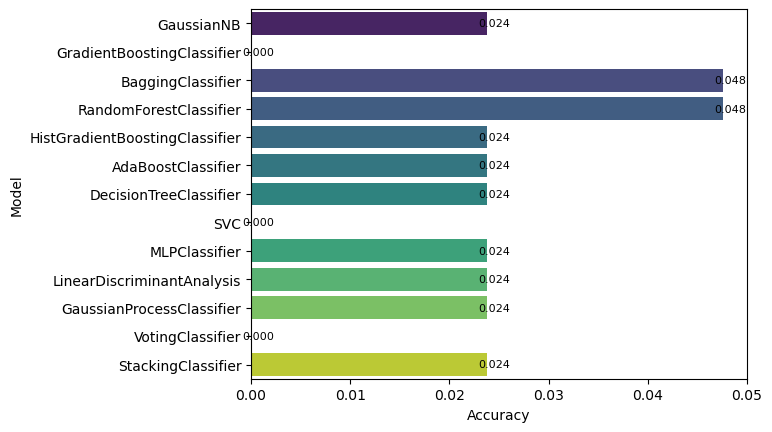

In [181]:
# Crear gráfico de barras con Seaborn
barplot = sns.barplot(x='Accuracy', y='Model', hue='Model', data=results_df, palette='viridis', legend=False)
for p in barplot.patches:
    barplot.annotate(f'{p.get_width():.3f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                     ha='center', va='center', fontsize=8, color='black', xytext=(5, 0), textcoords='offset points')


### Delta mfcc

In [198]:
delta_mfcc_average_df.head()

,delta_mfcc_0,delta_mfcc_1,delta_mfcc_2,delta_mfcc_3,delta_mfcc_4,delta_mfcc_5,delta_mfcc_6,delta_mfcc_7,delta_mfcc_8,delta_mfcc_9,delta_mfcc_10,delta_mfcc_11,delta_mfcc_12
0,2.404461,0.724249,-0.071412,0.168684,-0.025052,-0.023003,-0.119489,-0.04018,-0.12524,-0.023023,-0.090849,-0.003291,-0.074545


In [201]:
X, Y = [], []
for path, emotion in zip(RAVD_df['path'], RAVD_df['labels']):
    feature = get_feat(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [203]:
# Extraer las características de delta MFCC para cada archivo de audio y almacenarlas en listas X e Y
X, Y = [], []

for _, row in RAVD_df.iterrows():
    feature_delta_mfcc, feature_delta2_mfcc = extract_delta_mfcc_features(row['path'])
    if feature_delta_mfcc is not None:
        X.append(feature_delta_mfcc)
        Y.append(row['labels'])

# Crear un DataFrame con las características y etiquetas
delta_mfcc_df = pd.DataFrame(X, columns=[f'delta_mfcc_{i}' for i in range(13)])
delta2_mfcc_df = pd.DataFrame(X, columns=[f'delta2_mfcc_{i}' for i in range(13)])
delta_mfcc_df['labels'] = Y

# Guardar el DataFrame en un archivo CSV
delta_mfcc_df.to_csv('delta_mfcc_features.csv', index=False)

# Mostrar las primeras filas del DataFrame
print("\nDataFrame con Características de delta MFCC:")
print(delta_mfcc_df.head())



DataFrame con Características de delta MFCC:
   delta_mfcc_0  delta_mfcc_1  delta_mfcc_2  delta_mfcc_3  delta_mfcc_4  \
0      0.306345      0.005503     -0.066058     -0.065456     -0.077565   
1      0.049850      0.012541     -0.002103      0.018506     -0.007838   
2      0.374990      0.080606     -0.002308      0.068664     -0.032105   
3     -0.048629      0.001185      0.027715      0.007663      0.009824   
4      0.056691      0.102480     -0.007324      0.018981     -0.017417   

   delta_mfcc_5  delta_mfcc_6  delta_mfcc_7  delta_mfcc_8  delta_mfcc_9  \
0     -0.026090     -0.025332      0.005066     -0.048461     -0.000007   
1      0.002115      0.010270      0.008880     -0.001115     -0.006061   
2      0.051818      0.027547     -0.016586     -0.018222     -0.006036   
3     -0.003156     -0.001346     -0.012155      0.000411     -0.005715   
4      0.040705      0.052956     -0.016504     -0.011558     -0.013311   

   delta_mfcc_10  delta_mfcc_11  delta_mfcc_12     l

In [204]:
Emotions = pd.read_csv('delta_mfcc_features.csv')

# Mostrar las primeras filas del DataFrame
print("\nDataFrame leído desde el archivo CSV:")
print(Emotions.head())


DataFrame leído desde el archivo CSV:
   delta_mfcc_0  delta_mfcc_1  delta_mfcc_2  delta_mfcc_3  delta_mfcc_4  \
0      0.306345      0.005503     -0.066058     -0.065456     -0.077565   
1      0.049850      0.012541     -0.002103      0.018506     -0.007838   
2      0.374990      0.080606     -0.002308      0.068664     -0.032105   
3     -0.048629      0.001185      0.027715      0.007663      0.009824   
4      0.056691      0.102480     -0.007324      0.018981     -0.017417   

   delta_mfcc_5  delta_mfcc_6  delta_mfcc_7  delta_mfcc_8  delta_mfcc_9  \
0     -0.026090     -0.025332      0.005066     -0.048461     -0.000007   
1      0.002115      0.010270      0.008880     -0.001115     -0.006061   
2      0.051818      0.027547     -0.016586     -0.018222     -0.006036   
3     -0.003156     -0.001346     -0.012155      0.000411     -0.005715   
4      0.040705      0.052956     -0.016504     -0.011558     -0.013311   

   delta_mfcc_10  delta_mfcc_11  delta_mfcc_12     labels  

In [206]:
def extract_delta_mfcc_features(file_path, max_length=100):
    try:
        # Cargar el archivo de audio
        audio, _ = librosa.load(file_path, res_type='kaiser_fast')

        # Extraer características de MFCC
        mfccs = librosa.feature.mfcc(y=audio, sr=22050, n_mfcc=13)

        # Calcular derivadas de los coeficientes MFCC
        delta_mfccs = librosa.feature.delta(mfccs)
        delta2_mfccs = librosa.feature.delta(mfccs, order=2)

        # Tomar la media de las derivadas de los coeficientes MFCC
        delta_mfccs_mean = delta_mfccs.mean(axis=1)
        delta2_mfccs_mean = delta2_mfccs.mean(axis=1)

        # Asegurar que todas las características tengan la misma longitud
        if len(delta_mfccs_mean) < max_length:
            delta_mfccs_mean = np.pad(delta_mfccs_mean, (0, max_length - len(delta_mfccs_mean)))
        else:
            delta_mfccs_mean = delta_mfccs_mean[:max_length]

        if len(delta2_mfccs_mean) < max_length:
            delta2_mfccs_mean = np.pad(delta2_mfccs_mean, (0, max_length - len(delta2_mfccs_mean)))
        else:
            delta2_mfccs_mean = delta2_mfccs_mean[:max_length]

        return delta_mfccs_mean, delta2_mfccs_mean

    except Exception as e:
        print(f"Error al procesar {file_path}: {e}")
        return None, None


In [207]:
# Crear listas para almacenar características (X) y etiquetas (Y)
X, Y = [], []

# Longitud máxima de las secuencias
max_length = 100  # Puedes ajustar esto según sea necesario

# Iterar sobre el DataFrame RAVD_df
for path, emotion in zip(RAVD_df['path'], RAVD_df['labels']):
    # Obtener las características de delta MFCC
    feature_delta_mfcc, _ = extract_delta_mfcc_features(path)
    
    # Asegurar que todas las secuencias tengan la misma longitud (rellenar con ceros o truncar según sea necesario)
    if len(feature_delta_mfcc) < max_length:
        feature_delta_mfcc += [0] * (max_length - len(feature_delta_mfcc))
    else:
        feature_delta_mfcc = feature_delta_mfcc[:max_length]
    
    X.append(feature_delta_mfcc)
    Y.append(emotion)

# Convertir las listas a arrays
X = np.array(X)
Y = np.array(Y)

# Imprimir las longitudes para verificar la consistencia
print(len(X))
print(len(Y))


208
208


In [208]:
# Train and Test Split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((156, 100), (156,), (52, 100), (52,))

In [214]:
# Crear el modelo de regresión logística con más iteraciones o un solucionador diferente
logistic_model = LogisticRegression(max_iter=1000, solver='sag')  # Puedes ajustar el valor según sea necesario

In [215]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    print(f"Resultados de {model_name}")

    # Entrenar el modelo y realizar predicciones
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_test, predicted)
    print("Matriz de Confusión:")
    print(conf_matrix)

    # Imprimir un informe de clasificación detallado
    print("Informe de Clasificación:")
    print(classification_report(y_test, predicted, zero_division=1))
    print("\n" + "="*50 + "\n")

    # Devolver el accuracy
    accuracy = accuracy_score(y_test, predicted)
    return accuracy

# Resto del código...


data = pd.read_csv("delta_mfcc_features.csv")

# Asignar las características (X) y las etiquetas (y)
X = data.drop('labels', axis=1)  # Asegúrate de ajustar esto según las columnas reales en tu conjunto de datos
y = data['labels']

# Convertir etiquetas categóricas a valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lista de clasificadores
classifiers = [
    GaussianNB(),
    GradientBoostingClassifier(),
    BaggingClassifier(),
    RandomForestClassifier(),
    HistGradientBoostingClassifier(),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),SVC(),
    MLPClassifier(),
    LinearDiscriminantAnalysis(),
    GaussianProcessClassifier(),
    VotingClassifier(estimators=[('svc', SVC()), ('rf', RandomForestClassifier()), ('lr', LogisticRegression())]),
    StackingClassifier(estimators=[('svc', SVC()), ('rf', RandomForestClassifier()), ('lr', LogisticRegression())]),
]

# Almacenar resultados de accuracy
results = []

# Evaluación de cada clasificador
for model in classifiers:
    model_name = model.__class__.__name__
    accuracy = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, model_name)
    results.append({'Model': model_name, 'Accuracy': accuracy})

# Crear DataFrame de resultados
results_df = pd.DataFrame(results)


Resultados de GaussianNB
Matriz de Confusión:
[[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

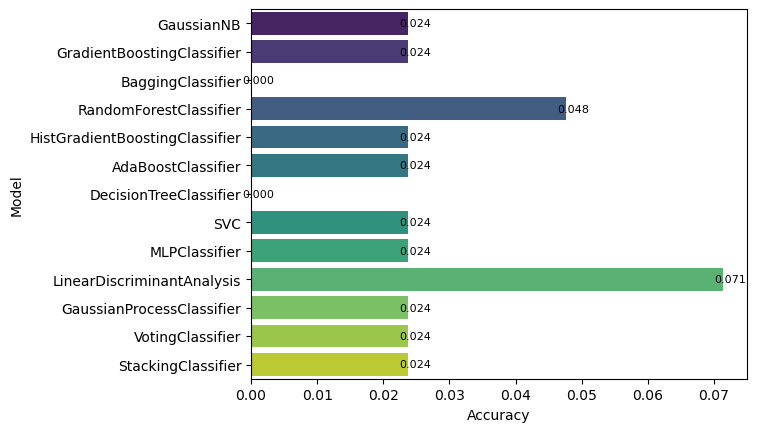

In [216]:
# Crear gráfico de barras con Seaborn
barplot = sns.barplot(x='Accuracy', y='Model', hue='Model', data=results_df, palette='viridis', legend=False)
for p in barplot.patches:
    barplot.annotate(f'{p.get_width():.3f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                     ha='center', va='center', fontsize=8, color='black', xytext=(5, 0), textcoords='offset points')

### Delta2 mfcc

In [217]:
delta2_mfcc_average_df.head()

,delta2_mfcc_0,delta2_mfcc_1,delta2_mfcc_2,delta2_mfcc_3,delta2_mfcc_4,delta2_mfcc_5,delta2_mfcc_6,delta2_mfcc_7,delta2_mfcc_8,delta2_mfcc_9,delta2_mfcc_10,delta2_mfcc_11,delta2_mfcc_12
0,-0.326105,-0.181223,0.016089,-0.061551,0.009118,0.004453,0.015931,0.006714,0.033162,0.006479,0.026517,-0.0045,0.011185


In [218]:
X, Y = [], []
for path, emotion in zip(RAVD_df['path'], RAVD_df['labels']):
    feature = get_feat(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [230]:
# Extraer las características de delta2 MFCC para cada archivo de audio y almacenarlas en listas X_delta2
X_delta2, Y = [], []

for _, row in RAVD_df.iterrows():
    feature_delta_mfcc, feature_delta2_mfcc = extract_delta_mfcc_features(row['path'])
    if feature_delta2_mfcc is not None:
        X_delta2.append(feature_delta2_mfcc)
        Y.append(row['labels'])

# Crear un DataFrame con las características y etiquetas de delta2 MFCC
delta2_mfcc_df = pd.DataFrame(X_delta2, columns=[f'delta2_mfcc_{i}' for i in range(100)])
delta2_mfcc_df['labels'] = Y

# Guardar el DataFrame en un archivo CSV (opcional)
delta2_mfcc_df.to_csv('delta2_mfcc_features.csv', index=False)

# Mostrar las primeras filas del DataFrame (opcional)
print("\nDataFrame con Características de delta2 MFCC:")
print(delta2_mfcc_df.head())



DataFrame con Características de delta2 MFCC:
   delta2_mfcc_0  delta2_mfcc_1  delta2_mfcc_2  delta2_mfcc_3  delta2_mfcc_4  \
0      -0.178747      -0.167903      -0.022297      -0.103393      -0.092774   
1      -0.036475      -0.016984       0.016168      -0.000372      -0.003553   
2      -0.085506      -0.014772       0.022574      -0.011773       0.008855   
3      -0.009002      -0.002177       0.002626      -0.004910      -0.003001   
4      -0.072085      -0.068177      -0.003691      -0.024669       0.001532   

   delta2_mfcc_5  delta2_mfcc_6  delta2_mfcc_7  delta2_mfcc_8  delta2_mfcc_9  \
0      -0.038228      -0.024500       0.022299       0.012375       0.006093   
1       0.001285      -0.004039       0.002753      -0.003725      -0.005133   
2      -0.014947      -0.015265       0.006313       0.000057      -0.002538   
3      -0.003068       0.000736       0.002221       0.000574       0.001546   
4      -0.012193      -0.018180       0.003800       0.018330       0.01

In [231]:
Emotions = pd.read_csv('delta2_mfcc_features.csv')

# Mostrar las primeras filas del DataFrame
print("\nDataFrame leído desde el archivo CSV:")
print(Emotions.head())


DataFrame leído desde el archivo CSV:
   delta2_mfcc_0  delta2_mfcc_1  delta2_mfcc_2  delta2_mfcc_3  delta2_mfcc_4  \
0      -0.178747      -0.167903      -0.022297      -0.103393      -0.092774   
1      -0.036475      -0.016984       0.016168      -0.000372      -0.003553   
2      -0.085506      -0.014772       0.022574      -0.011773       0.008855   
3      -0.009002      -0.002177       0.002626      -0.004910      -0.003001   
4      -0.072085      -0.068177      -0.003691      -0.024669       0.001532   

   delta2_mfcc_5  delta2_mfcc_6  delta2_mfcc_7  delta2_mfcc_8  delta2_mfcc_9  \
0      -0.038228      -0.024500       0.022299       0.012375       0.006093   
1       0.001285      -0.004039       0.002753      -0.003725      -0.005133   
2      -0.014947      -0.015265       0.006313       0.000057      -0.002538   
3      -0.003068       0.000736       0.002221       0.000574       0.001546   
4      -0.012193      -0.018180       0.003800       0.018330       0.017685   


In [233]:
import librosa
import numpy as np

def extract_delta2_mfcc_features(file_path, max_length=100):
    try:
        # Cargar el archivo de audio
        audio, _ = librosa.load(file_path, res_type='kaiser_fast')

        # Extraer características de MFCC
        mfccs = librosa.feature.mfcc(y=audio, sr=22050, n_mfcc=13)

        # Calcular derivadas de los coeficientes MFCC
        delta2_mfccs = librosa.feature.delta(mfccs, order=2)

        # Tomar la media de las derivadas de los coeficientes MFCC
        delta2_mfccs_mean = delta2_mfccs.mean(axis=1)

        # Asegurar que todas las características tengan la misma longitud
        if len(delta2_mfccs_mean) < max_length:
            delta2_mfccs_mean = np.pad(delta2_mfccs_mean, (0, max_length - len(delta2_mfccs_mean)))
        else:
            delta2_mfccs_mean = delta2_mfccs_mean[:max_length]

        return delta2_mfccs_mean

    except Exception as e:
        print(f"Error al procesar {file_path}: {e}")
        return None


In [234]:
# Crear listas para almacenar características (X) y etiquetas (Y)
X, Y = [], []

# Longitud máxima de las secuencias
max_length = 100  # Puedes ajustar esto según sea necesario

# Iterar sobre el DataFrame RAVD_df
for path, emotion in zip(RAVD_df['path'], RAVD_df['labels']):
    # Obtener las características de delta2 MFCC
    _, feature_delta2_mfcc = extract_delta_mfcc_features(path)
    
    # Asegurar que todas las secuencias tengan la misma longitud (rellenar con ceros o truncar según sea necesario)
    if len(feature_delta2_mfcc) < max_length:
        feature_delta2_mfcc += [0] * (max_length - len(feature_delta2_mfcc))
    else:
        feature_delta2_mfcc = feature_delta2_mfcc[:max_length]
    
    X.append(feature_delta2_mfcc)
    Y.append(emotion)

# Convertir las listas a arrays
X = np.array(X)
Y = np.array(Y)

# Imprimir las longitudes para verificar la consistencia
print(len(X))

print(len(Y))

208
208


In [235]:
# Train and Test Split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((156, 100), (156,), (52, 100), (52,))

In [238]:
# Crear el modelo de regresión logística con más iteraciones o un solucionador diferente
logistic_model = LogisticRegression(max_iter=1000, solver='sag')  # Puedes ajustar el valor según sea necesario

In [239]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    print(f"Resultados de {model_name}")

    # Entrenar el modelo y realizar predicciones
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_test, predicted)
    print("Matriz de Confusión:")
    print(conf_matrix)

    # Imprimir un informe de clasificación detallado
    print("Informe de Clasificación:")
    print(classification_report(y_test, predicted, zero_division=1))
    print("\n" + "="*50 + "\n")

    # Devolver el accuracy
    accuracy = accuracy_score(y_test, predicted)
    return accuracy

# Resto del código...


data = pd.read_csv("delta2_mfcc_features.csv")

# Asignar las características (X) y las etiquetas (y)
X = data.drop('labels', axis=1)  # Asegúrate de ajustar esto según las columnas reales en tu conjunto de datos
y = data['labels']

# Convertir etiquetas categóricas a valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lista de clasificadores
classifiers = [
    GaussianNB(),
    GradientBoostingClassifier(),
    BaggingClassifier(),
    RandomForestClassifier(),
    HistGradientBoostingClassifier(),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),SVC(),
    MLPClassifier(),
    LinearDiscriminantAnalysis(),
    GaussianProcessClassifier(),
    VotingClassifier(estimators=[('svc', SVC()), ('rf', RandomForestClassifier()), ('lr', LogisticRegression())]),
    StackingClassifier(estimators=[('svc', SVC()), ('rf', RandomForestClassifier()), ('lr', LogisticRegression())]),
]

# Almacenar resultados de accuracy
results = []

# Evaluación de cada clasificador
for model in classifiers:
    model_name = model.__class__.__name__
    accuracy = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, model_name)
    results.append({'Model': model_name, 'Accuracy': accuracy})

# Crear DataFrame de resultados
results_df = pd.DataFrame(results)


Resultados de GaussianNB
Matriz de Confusión:
[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0

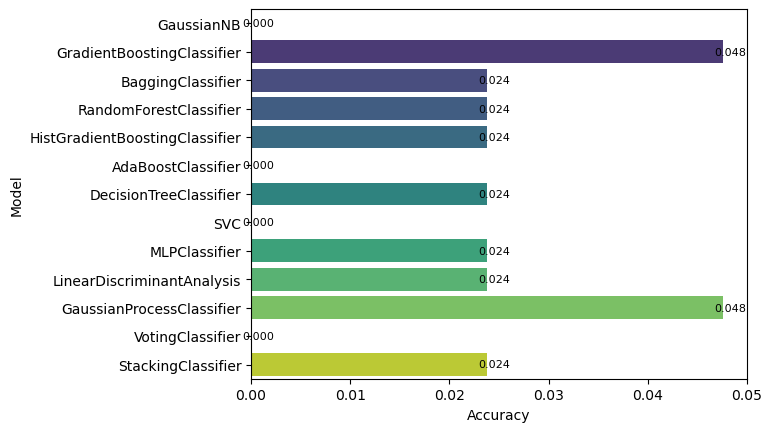

In [240]:
# Crear gráfico de barras con Seaborn
barplot = sns.barplot(x='Accuracy', y='Model', hue='Model', data=results_df, palette='viridis', legend=False)
for p in barplot.patches:
    barplot.annotate(f'{p.get_width():.3f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                     ha='center', va='center', fontsize=8, color='black', xytext=(5, 0), textcoords='offset points')

<center>
<div style="color:;
           display:fill;
           border-radius:1px;
           background-color: cadetblue;
           font-size:110%;
           letter-spacing:0.3px">

<h2 style="padding: 20px;
              color:white;"> Extracción de características de los mejores modelos de selección
</h2>
</div> 

Los codigos siguientes son proceso típico de entrenamiento de modelos, selección de características y visualización de la importancia de características.

### MFCC features

In [253]:
# Crear listas para almacenar características (X) y etiquetas (Y)
X, Y = [], []

# Iterar sobre filas del DataFrame RAVD_df
for _, row in RAVD_df.iterrows():
    feature = extract_mfcc_features(row['path'])
    if feature is not None:
        X.append(feature)
        Y.append(row['labels'])

# Crear un DataFrame con las características y etiquetas
mfcc_columns = [f'mfcc_{i}' for i in range(13)]
Emotions = pd.DataFrame(X, columns=mfcc_columns)
Emotions['labels'] = Y

# Separar datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(Emotions.drop('labels', axis=1), Emotions['labels'], test_size=0.2, random_state=42)

# Mostrar las primeras filas del DataFrame
Emotions.head()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,labels
0,-267.772705,103.642448,-2.273399,20.127445,6.863217,-0.736976,-10.464468,-1.153533,-22.764969,-4.066233,-19.755054,5.807973,-15.329861,male_13
1,-298.096802,163.309204,-18.559565,35.612171,19.759258,6.233207,-4.237757,-2.757037,-7.946128,-8.795916,-4.035038,-9.391767,-4.384284,female_8
2,-171.334595,62.774906,-13.354585,52.940342,-3.531311,-13.033175,-26.382557,1.929624,-21.926762,1.595826,-15.324421,-14.226273,-10.448240,female_18
3,-189.568649,155.520981,-14.831610,37.275845,2.374464,8.697567,-14.036818,6.147840,1.359950,-0.792405,-2.431035,-5.060528,0.598103,male_9
4,-195.970139,31.199951,11.983189,62.444138,8.688306,-3.900945,-23.597389,-4.436647,-26.420376,0.587952,-22.951365,7.304323,-17.453709,male_19


Características Seleccionadas para GradientBoostingClassifier:
Index(['mfcc_1', 'mfcc_2', 'mfcc_8', 'mfcc_12'], dtype='object')
Número de Características Seleccionadas para GradientBoostingClassifier: 4
Umbral de Selección para GradientBoostingClassifier: 0.07692307692307693
Importancia de Características para GradientBoostingClassifier:
    Feature  Importance
8    mfcc_8    0.231167
1    mfcc_1    0.158747
2    mfcc_2    0.126207
12  mfcc_12    0.099212
11  mfcc_11    0.066853
4    mfcc_4    0.058650
0    mfcc_0    0.057661
6    mfcc_6    0.043444
3    mfcc_3    0.038709
7    mfcc_7    0.037161
9    mfcc_9    0.035733
10  mfcc_10    0.035627
5    mfcc_5    0.010830


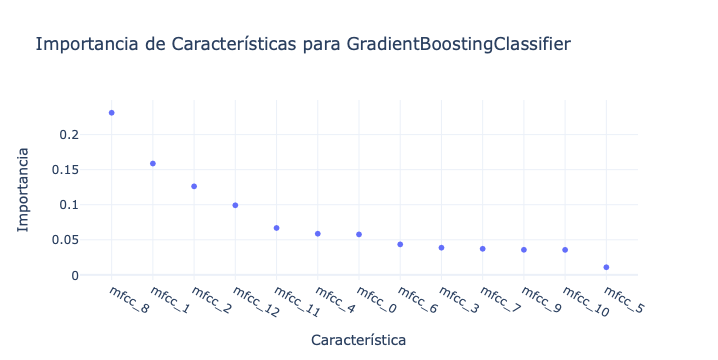

In [248]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import plotly.express as px

import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo con características de MFCC
data = {
    'mfcc_0': np.random.rand(100),
    'mfcc_1': np.random.rand(100),
    'mfcc_2': np.random.rand(100),
    'mfcc_3': np.random.rand(100),
    'mfcc_4': np.random.rand(100),
    'mfcc_5': np.random.rand(100),
    'mfcc_6': np.random.rand(100),
    'mfcc_7': np.random.rand(100),
    'mfcc_8': np.random.rand(100),
    'mfcc_9': np.random.rand(100),
    'mfcc_10': np.random.rand(100),
    'mfcc_11': np.random.rand(100),
    'mfcc_12': np.random.rand(100),
    'labels': np.random.choice(['female', 'male'], size=100)
}

df_mfcc = pd.DataFrame(data)

# Ahora puedes usar el código con este DataFrame de ejemplo
X_mfcc = df_mfcc.drop('labels', axis=1)

# Resto del código...
# Supongamos que tienes un DataFrame llamado 'df_mfcc' con las características de MFCC
# X_mfcc sería tu conjunto de características de MFCC
X_mfcc = df_mfcc.drop('labels', axis=1)  # Asegúrate de ajustar según la estructura real de tu DataFrame

# Convertir etiquetas de destino a valores numéricos
label_encoder = LabelEncoder()
y_mfcc_encoded = label_encoder.fit_transform(df_mfcc['labels'])

# Entrenar el modelo GradientBoostingClassifier
model_gb_clf_mfcc = GradientBoostingClassifier()
model_gb_clf_mfcc.fit(X_mfcc, y_mfcc_encoded)

# Utilizar SelectFromModel para el GradientBoostingClassifier
sfm_gb_clf_mfcc = SelectFromModel(model_gb_clf_mfcc, threshold='mean')
sfm_gb_clf_mfcc.fit(X_mfcc, y_mfcc_encoded)
X_new_gb_clf_mfcc = sfm_gb_clf_mfcc.transform(X_mfcc)

# Obtener las características seleccionadas para el GradientBoostingClassifier
selected_features_gb_clf_mfcc = X_mfcc.columns[sfm_gb_clf_mfcc.get_support()]

# Imprimir las características seleccionadas para el GradientBoostingClassifier
print("Características Seleccionadas para GradientBoostingClassifier:")
print(selected_features_gb_clf_mfcc)

# Imprimir el número de características seleccionadas para GradientBoostingClassifier
num_selected_features_gb_clf_mfcc = len(selected_features_gb_clf_mfcc)
print("Número de Características Seleccionadas para GradientBoostingClassifier:", num_selected_features_gb_clf_mfcc)

# Imprimir el umbral de selección para GradientBoostingClassifier
print("Umbral de Selección para GradientBoostingClassifier:", sfm_gb_clf_mfcc.threshold_)

# Visualizar la importancia de las características para GradientBoostingClassifier
feature_importances_gb_clf_mfcc = model_gb_clf_mfcc.feature_importances_
selected_features_df_gb_clf_mfcc = pd.DataFrame({
    'Feature': X_mfcc.columns,
    'Importance': feature_importances_gb_clf_mfcc
})
selected_features_df_gb_clf_mfcc = selected_features_df_gb_clf_mfcc.sort_values(by='Importance', ascending=False)
print("Importancia de Características para GradientBoostingClassifier:")
print(selected_features_df_gb_clf_mfcc)

# Visualizar la importancia de las características con Plotly para GradientBoostingClassifier
fig_gb_clf_mfcc = px.scatter(
    selected_features_df_gb_clf_mfcc,
    x='Feature',
    y='Importance',
    title='Importancia de Características para GradientBoostingClassifier',
    labels={'Importance': 'Importancia', 'Feature': 'Característica'},
    template='plotly_white'
)
fig_gb_clf_mfcc.show()


In [260]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [265]:
pip install --upgrade pip

  Using cached pip-23.3.2-py3-none-any.whl.metadata (3.5 kB)
Using cached pip-23.3.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1
Note: you may need to restart the kernel to use updated packages.


Características Seleccionadas para RandomForestClassifier:
Index(['mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_7', 'mfcc_8', 'mfcc_10'], dtype='object')
Número de Características Seleccionadas para RandomForestClassifier: 6
Umbral de Selección para RandomForestClassifier: 0.07692307692307693
Importancia de Características para RandomForestClassifier:
    Feature  Importance
7    mfcc_7    0.099318
2    mfcc_2    0.098611
3    mfcc_3    0.097859
8    mfcc_8    0.096259
10  mfcc_10    0.086108
4    mfcc_4    0.082918
6    mfcc_6    0.073348
12  mfcc_12    0.071558
9    mfcc_9    0.063994
11  mfcc_11    0.062212
5    mfcc_5    0.060217
0    mfcc_0    0.058000
1    mfcc_1    0.049598


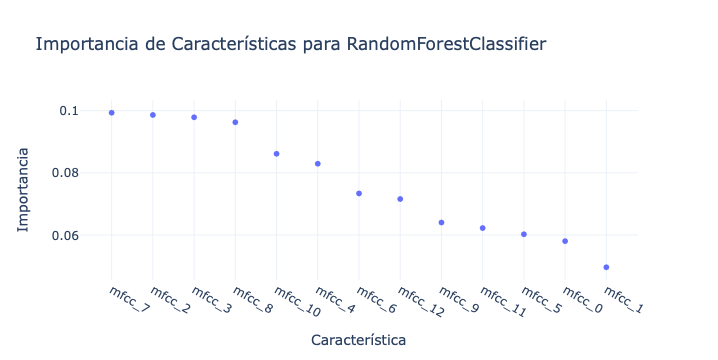

In [273]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import plotly.express as px

# Crear un DataFrame de ejemplo
data = {
    'mfcc_0': np.random.rand(100),
    'mfcc_1': np.random.rand(100),
    'mfcc_2': np.random.rand(100),
    'mfcc_3': np.random.rand(100),
    'mfcc_4': np.random.rand(100),
    'mfcc_5': np.random.rand(100),
    'mfcc_6': np.random.rand(100),
    'mfcc_7': np.random.rand(100),
    'mfcc_8': np.random.rand(100),
    'mfcc_9': np.random.rand(100),
    'mfcc_10': np.random.rand(100),
    'mfcc_11': np.random.rand(100),
    'mfcc_12': np.random.rand(100),
    'labels': np.random.choice(['female', 'male'], size=100)
}

df_mfcc = pd.DataFrame(data)

# Supongamos que tienes un DataFrame llamado 'df_mfcc' con las características de MFCC
# X_mfcc sería tu conjunto de características de MFCC
X_mfcc = df_mfcc.drop('labels', axis=1)  # Asegúrate de ajustar según la estructura real de tu DataFrame

# Convertir etiquetas de destino a valores numéricos
label_encoder = LabelEncoder()
y_mfcc_encoded = label_encoder.fit_transform(df_mfcc['labels'])

# Entrenar el modelo RandomForestClassifier
model_rf_clf_mfcc = RandomForestClassifier(n_estimators=50, random_state=42)
model_rf_clf_mfcc.fit(X_mfcc, y_mfcc_encoded)

# Utilizar SelectFromModel para el RandomForestClassifier
sfm_rf_clf_mfcc = SelectFromModel(model_rf_clf_mfcc, threshold='mean')
sfm_rf_clf_mfcc.fit(X_mfcc, y_mfcc_encoded)
X_new_rf_clf_mfcc = sfm_rf_clf_mfcc.transform(X_mfcc)

# Obtener las características seleccionadas para el RandomForestClassifier
selected_features_rf_clf_mfcc = X_mfcc.columns[sfm_rf_clf_mfcc.get_support()]

# Imprimir las características seleccionadas para el RandomForestClassifier
print("Características Seleccionadas para RandomForestClassifier:")
print(selected_features_rf_clf_mfcc)

# Imprimir el número de características seleccionadas para RandomForestClassifier
num_selected_features_rf_clf_mfcc = len(selected_features_rf_clf_mfcc)
print("Número de Características Seleccionadas para RandomForestClassifier:", num_selected_features_rf_clf_mfcc)

# Imprimir el umbral de selección para RandomForestClassifier
print("Umbral de Selección para RandomForestClassifier:", sfm_rf_clf_mfcc.threshold_)

# Visualizar la importancia de las características para RandomForestClassifier
feature_importances_rf_clf_mfcc = model_rf_clf_mfcc.feature_importances_
selected_features_df_rf_clf_mfcc = pd.DataFrame({
    'Feature': X_mfcc.columns,
    'Importance': feature_importances_rf_clf_mfcc
})
selected_features_df_rf_clf_mfcc = selected_features_df_rf_clf_mfcc.sort_values(by='Importance', ascending=False)
print("Importancia de Características para RandomForestClassifier:")
print(selected_features_df_rf_clf_mfcc)

# Visualizar la importancia de las características con Plotly para RandomForestClassifier
fig_rf_clf_mfcc = px.scatter(
    selected_features_df_rf_clf_mfcc,
    x='Feature',
    y='Importance',
    title='Importancia de Características para RandomForestClassifier',
    labels={'Importance': 'Importancia', 'Feature': 'Característica'},
    template='plotly_white'
)
fig_rf_clf_mfcc.show()


Características Seleccionadas para GaussianProcessClassifier:
Index(['mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_5', 'mfcc_6', 'mfcc_9'], dtype='object')
Número de Características Seleccionadas para GaussianProcessClassifier: 6


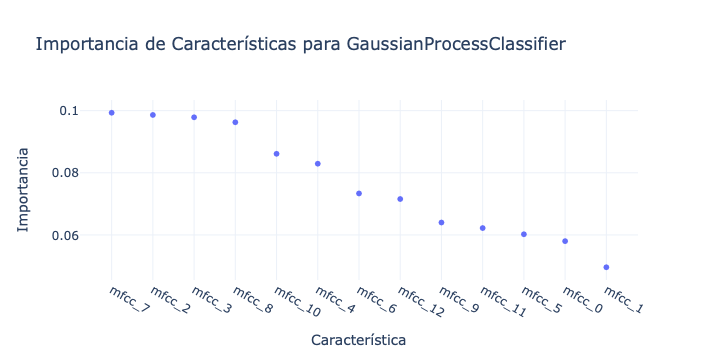

In [279]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import plotly.express as px

# Crear un DataFrame de ejemplo
data = {
    'mfcc_0': np.random.rand(100),
    'mfcc_1': np.random.rand(100),
    'mfcc_2': np.random.rand(100),
    'mfcc_3': np.random.rand(100),
    'mfcc_4': np.random.rand(100),
    'mfcc_5': np.random.rand(100),
    'mfcc_6': np.random.rand(100),
    'mfcc_7': np.random.rand(100),
    'mfcc_8': np.random.rand(100),
    'mfcc_9': np.random.rand(100),
    'mfcc_10': np.random.rand(100),
    'mfcc_11': np.random.rand(100),
    'mfcc_12': np.random.rand(100),
    'labels': np.random.choice(['female', 'male'], size=100)
}

df_mfcc = pd.DataFrame(data)

# Supongamos que tienes un DataFrame llamado 'df_mfcc' con las características de MFCC
# X_mfcc sería tu conjunto de características de MFCC
X_mfcc = df_mfcc.drop('labels', axis=1)  # Asegúrate de ajustar según la estructura real de tu DataFrame

# Convertir etiquetas de destino a valores numéricos
label_encoder = LabelEncoder()
y_mfcc_encoded = label_encoder.fit_transform(df_mfcc['labels'])

# Entrenar el modelo GaussianProcessClassifier
kernel = 1.0 * RBF()
model_gp_clf_mfcc = GaussianProcessClassifier(kernel=kernel, random_state=42)
model_gp_clf_mfcc.fit(X_mfcc, y_mfcc_encoded)

# Utilizar SelectPercentile para seleccionar características
percentile = 50  # Puedes ajustar este valor según tus necesidades
selector = SelectPercentile(f_classif, percentile=percentile)
selector.fit(X_mfcc, y_mfcc_encoded)
X_selected_gp_clf_mfcc = selector.transform(X_mfcc)

# Obtener las características seleccionadas para el GaussianProcessClassifier
selected_features_gp_clf_mfcc = X_mfcc.columns[selector.get_support()]

# Imprimir las características seleccionadas para el GaussianProcessClassifier
print("Características Seleccionadas para GaussianProcessClassifier:")
print(selected_features_gp_clf_mfcc)

# Imprimir el número de características seleccionadas para GaussianProcessClassifier
num_selected_features_gp_clf_mfcc = len(selected_features_gp_clf_mfcc)
print("Número de Características Seleccionadas para GaussianProcessClassifier:", num_selected_features_gp_clf_mfcc)

# Visualizar la importancia de las características con Plotly para RandomForestClassifier
fig_rf_clf_mfcc = px.scatter(
    selected_features_df_rf_clf_mfcc,
    x='Feature',
    y='Importance',
    title='Importancia de Características para GaussianProcessClassifier',
    labels={'Importance': 'Importancia', 'Feature': 'Característica'},
    template='plotly_white'
)
fig_rf_clf_mfcc.show()


### Delta mfcc

In [293]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Crear listas para almacenar características (X) y etiquetas (Y) para delta MFCC
X_delta, Y_delta = [], []

# Iterar sobre filas del DataFrame RAVD_df para obtener delta MFCC
for _, row in RAVD_df.iterrows():
    feature_delta_mfcc, _ = extract_delta_mfcc_features(row['path'])
    if feature_delta_mfcc is not None:
        X_delta.append(feature_delta_mfcc)
        Y_delta.append(row['labels'])

# Crear un DataFrame con las características y etiquetas para delta MFCC
delta_mfcc_df = pd.DataFrame(X_delta)
delta_mfcc_df['labels'] = Y_delta

# Guardar el DataFrame en un archivo CSV
delta_mfcc_df.to_csv('delta_mfcc_features.csv', index=False)

# Mostrar las primeras filas del DataFrame de delta MFCC
print("\nDataFrame con Características de delta MFCC:")
print(delta_mfcc_df.head())



DataFrame con Características de delta MFCC:
          0         1         2         3         4         5         6  \
0  0.306345  0.005503 -0.066058 -0.065456 -0.077565 -0.026090 -0.025332   
1  0.049850  0.012541 -0.002103  0.018506 -0.007838  0.002115  0.010270   
2  0.374990  0.080606 -0.002308  0.068664 -0.032105  0.051818  0.027547   
3 -0.048629  0.001185  0.027715  0.007663  0.009824 -0.003156 -0.001346   
4  0.056691  0.102480 -0.007324  0.018981 -0.017417  0.040705  0.052956   

          7         8         9  ...   91   92   93   94   95   96   97   98  \
0  0.005066 -0.048461 -0.000007  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.008880 -0.001115 -0.006061  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2 -0.016586 -0.018222 -0.006036  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3 -0.012155  0.000411 -0.005715  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4 -0.016504 -0.011558 -0.013311  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    99     labels  
0 

Características Seleccionadas para RandomForestClassifier con características delta:
Index(['delta_mfcc_1', 'delta_mfcc_5', 'delta_mfcc_7', 'delta_mfcc_8',
       'delta_mfcc_9', 'delta_mfcc_12'],
      dtype='object')
Número de Características Seleccionadas para RandomForestClassifier con características delta: 6
Umbral de Selección para RandomForestClassifier con características delta: 0.07692307692307693
Importancia de Características para RandomForestClassifier con características delta:
          Feature  Importance
5    delta_mfcc_5    0.111018
7    delta_mfcc_7    0.099809
12  delta_mfcc_12    0.099499
8    delta_mfcc_8    0.093389
1    delta_mfcc_1    0.085671
9    delta_mfcc_9    0.077368
3    delta_mfcc_3    0.070391
0    delta_mfcc_0    0.064687
2    delta_mfcc_2    0.064300
10  delta_mfcc_10    0.063539
4    delta_mfcc_4    0.059893
11  delta_mfcc_11    0.056042
6    delta_mfcc_6    0.054394


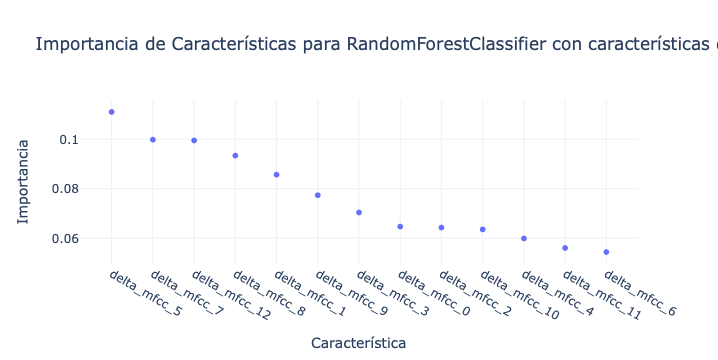

In [294]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

# Crear un DataFrame de ejemplo para características delta
data_delta = {
    'delta_mfcc_0': np.random.rand(100),
    'delta_mfcc_1': np.random.rand(100),
    'delta_mfcc_2': np.random.rand(100),
    'delta_mfcc_3': np.random.rand(100),
    'delta_mfcc_4': np.random.rand(100),
    'delta_mfcc_5': np.random.rand(100),
    'delta_mfcc_6': np.random.rand(100),
    'delta_mfcc_7': np.random.rand(100),
    'delta_mfcc_8': np.random.rand(100),
    'delta_mfcc_9': np.random.rand(100),
    'delta_mfcc_10': np.random.rand(100),
    'delta_mfcc_11': np.random.rand(100),
    'delta_mfcc_12': np.random.rand(100),
    'labels': np.random.choice(['female', 'male'], size=100)
}

df_delta = pd.DataFrame(data_delta)

# Supongamos que tienes un DataFrame llamado 'df_delta' con las características delta
X_delta = df_delta.drop('labels', axis=1)  # Asegúrate de ajustar según la estructura real de tu DataFrame

# Convertir etiquetas de destino a valores numéricos
label_encoder_delta = LabelEncoder()
y_delta_encoded = label_encoder_delta.fit_transform(df_delta['labels'])

# Entrenar el modelo RandomForestClassifier para características delta
model_rf_clf_delta = RandomForestClassifier(n_estimators=50, random_state=42)
model_rf_clf_delta.fit(X_delta, y_delta_encoded)

# Utilizar SelectFromModel para el RandomForestClassifier con características delta
sfm_rf_clf_delta = SelectFromModel(model_rf_clf_delta, threshold='mean')
sfm_rf_clf_delta.fit(X_delta, y_delta_encoded)
X_new_rf_clf_delta = sfm_rf_clf_delta.transform(X_delta)

# Obtener las características seleccionadas para el RandomForestClassifier con características delta
selected_features_rf_clf_delta = X_delta.columns[sfm_rf_clf_delta.get_support()]

# Imprimir las características seleccionadas para el RandomForestClassifier con características delta
print("Características Seleccionadas para RandomForestClassifier con características delta:")
print(selected_features_rf_clf_delta)

# Imprimir el número de características seleccionadas para RandomForestClassifier con características delta
num_selected_features_rf_clf_delta = len(selected_features_rf_clf_delta)
print("Número de Características Seleccionadas para RandomForestClassifier con características delta:", num_selected_features_rf_clf_delta)

# Imprimir el umbral de selección para RandomForestClassifier con características delta
print("Umbral de Selección para RandomForestClassifier con características delta:", sfm_rf_clf_delta.threshold_)

# Visualizar la importancia de las características para RandomForestClassifier con características delta
feature_importances_rf_clf_delta = model_rf_clf_delta.feature_importances_
selected_features_df_rf_clf_delta = pd.DataFrame({
    'Feature': X_delta.columns,
    'Importance': feature_importances_rf_clf_delta
})
selected_features_df_rf_clf_delta = selected_features_df_rf_clf_delta.sort_values(by='Importance', ascending=False)
print("Importancia de Características para RandomForestClassifier con características delta:")
print(selected_features_df_rf_clf_delta)

# Visualizar la importancia de las características con Plotly para RandomForestClassifier con características delta
fig_rf_clf_delta = px.scatter(
    selected_features_df_rf_clf_delta,
    x='Feature',
    y='Importance',
    title='Importancia de Características para RandomForestClassifier con características delta',
    labels={'Importance': 'Importancia', 'Feature': 'Característica'},
    template='plotly_white'
)
fig_rf_clf_delta.show()


Características Seleccionadas para LinearDiscriminantAnalysis con características delta:
Index(['delta_mfcc_0', 'delta_mfcc_1', 'delta_mfcc_2', 'delta_mfcc_3',
       'delta_mfcc_4', 'delta_mfcc_5', 'delta_mfcc_6', 'delta_mfcc_7',
       'delta_mfcc_8', 'delta_mfcc_9', 'delta_mfcc_10', 'delta_mfcc_11',
       'delta_mfcc_12'],
      dtype='object')
Coeficientes para LinearDiscriminantAnalysis con características delta:
[[ 0.43362986 -0.96428199 -1.36336832 -1.22352673  0.30416319 -0.54103425
   0.86289292 -0.42344265 -0.46605041 -0.55712393  0.16984296  0.35581426
  -0.4727479 ]]


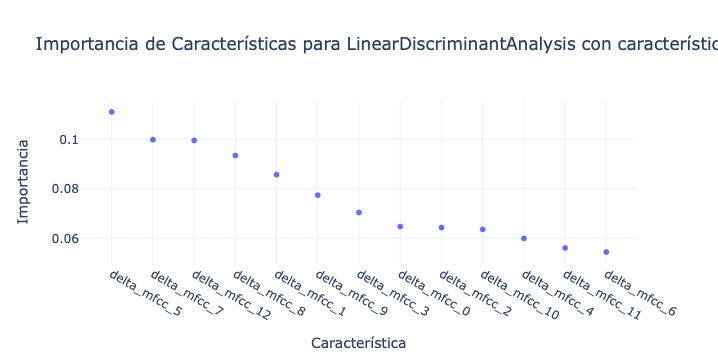

In [296]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

# Crear un DataFrame de ejemplo para características delta
data_delta = {
    'delta_mfcc_0': np.random.rand(100),
    'delta_mfcc_1': np.random.rand(100),
    'delta_mfcc_2': np.random.rand(100),
    'delta_mfcc_3': np.random.rand(100),
    'delta_mfcc_4': np.random.rand(100),
    'delta_mfcc_5': np.random.rand(100),
    'delta_mfcc_6': np.random.rand(100),
    'delta_mfcc_7': np.random.rand(100),
    'delta_mfcc_8': np.random.rand(100),
    'delta_mfcc_9': np.random.rand(100),
    'delta_mfcc_10': np.random.rand(100),
    'delta_mfcc_11': np.random.rand(100),
    'delta_mfcc_12': np.random.rand(100),
    'labels': np.random.choice(['female', 'male'], size=100)
}

df_delta = pd.DataFrame(data_delta)

# Supongamos que tienes un DataFrame llamado 'df_delta' con las características delta
X_delta = df_delta.drop('labels', axis=1)  # Asegúrate de ajustar según la estructura real de tu DataFrame

# Convertir etiquetas de destino a valores numéricos
label_encoder_delta = LabelEncoder()
y_delta_encoded = label_encoder_delta.fit_transform(df_delta['labels'])

# Entrenar el modelo LinearDiscriminantAnalysis para características delta
model_lda_delta = LinearDiscriminantAnalysis()
model_lda_delta.fit(X_delta, y_delta_encoded)

# Obtener las características seleccionadas para el LinearDiscriminantAnalysis con características delta
selected_features_lda_delta = X_delta.columns  # LDA no tiene una etapa de selección de características como RandomForestClassifier

# Imprimir las características seleccionadas para el LinearDiscriminantAnalysis con características delta
print("Características Seleccionadas para LinearDiscriminantAnalysis con características delta:")
print(selected_features_lda_delta)

# Visualizar la importancia de las características para LinearDiscriminantAnalysis con características delta
# No hay importancias directas en LDA, ya que no realiza selección de características como RandomForestClassifier
# Pero puedes imprimir coeficientes si es necesario
print("Coeficientes para LinearDiscriminantAnalysis con características delta:")
print(model_lda_delta.coef_)

# Visualizar la proyección de las características en el espacio LDA
X_lda_delta = model_lda_delta.transform(X_delta)
lda_projection_df_delta = pd.DataFrame(X_lda_delta, columns=['LDA_Component_1'])
lda_projection_df_delta['labels'] = df_delta['labels']

# Visualizar la importancia de las características con Plotly para RandomForestClassifier con características delta
fig_rf_clf_delta = px.scatter(
    selected_features_df_rf_clf_delta,
    x='Feature',
    y='Importance',
    title='Importancia de Características para LinearDiscriminantAnalysis con características delta',
    labels={'Importance': 'Importancia', 'Feature': 'Característica'},
    template='plotly_white'
)
fig_rf_clf_delta.show()



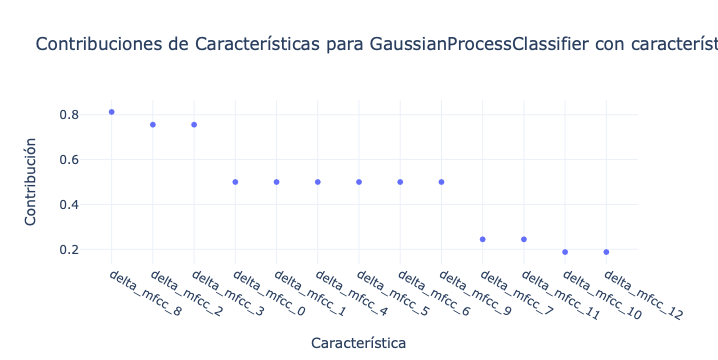

In [340]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
import plotly.express as px

# Crear un DataFrame de ejemplo para características delta
data_delta = {
    'delta_mfcc_0': np.random.rand(100),
    'delta_mfcc_1': np.random.rand(100),
    'delta_mfcc_2': np.random.rand(100),
    'delta_mfcc_3': np.random.rand(100),
    'delta_mfcc_4': np.random.rand(100),
    'delta_mfcc_5': np.random.rand(100),
    'delta_mfcc_6': np.random.rand(100),
    'delta_mfcc_7': np.random.rand(100),
    'delta_mfcc_8': np.random.rand(100),
    'delta_mfcc_9': np.random.rand(100),
    'delta_mfcc_10': np.random.rand(100),
    'delta_mfcc_11': np.random.rand(100),
    'delta_mfcc_12': np.random.rand(100),
    'labels': np.random.choice(['female', 'male'], size=100)
}

df_delta = pd.DataFrame(data_delta)

# Supongamos que tienes un DataFrame llamado 'df_delta' con las características delta
X_delta = df_delta.drop('labels', axis=1)  # Asegúrate de ajustar según la estructura real de tu DataFrame

# Convertir etiquetas de destino a valores numéricos
label_encoder_delta = LabelEncoder()
y_delta_encoded = label_encoder_delta.fit_transform(df_delta['labels'])

# Entrenar el modelo BaggingClassifier para características delta (usando GaussianProcessClassifier como estimador base)
kernel = 1.0 * RBF()
model_bagging_clf_delta = BaggingClassifier(GaussianProcessClassifier(kernel), n_estimators=10, random_state=42)
model_bagging_clf_delta.fit(X_delta, y_delta_encoded)

# Obtener el décimo clasificador base
i = 9  # índice 9 para el décimo clasificador (índice 0-based)
gpc = model_bagging_clf_delta.estimators_[i]

# Visualizar la importancia de las características con Plotly para este clasificador base
contribuciones_caracteristicas = gpc.predict_proba(X_delta)[:, 1]  # Usamos predict_proba para obtener las contribuciones

# Asegurar que ambas listas tengan la misma longitud
num_samples = X_delta.shape[0]
# Visualizar la importancia de las características con Plotly para este clasificador base
contribuciones_caracteristicas = gpc.predict_proba(X_delta)[:, 1]  # Usamos predict_proba para obtener las contribuciones

# Asegurarse de que ambas listas tengan la misma longitud
num_samples = X_delta.shape[0]
contribuciones_caracteristicas = np.append(contribuciones_caracteristicas, [np.nan] * (num_samples - len(contribuciones_caracteristicas)))


# Crear el DataFrame con las características seleccionadas y sus contribuciones
selected_features_df_gpc_clf_delta = pd.DataFrame({
    'Feature': X_delta.columns,
    'Contribucion': contribuciones_caracteristicas[:len(X_delta.columns)]  # Ajustar la longitud de acuerdo al número de características
})

selected_features_df_gpc_clf_delta = selected_features_df_gpc_clf_delta.sort_values(by='Contribucion', ascending=False)

# Visualizar la importancia de las características con Plotly
fig_gpc_clf_delta = px.scatter(
    selected_features_df_gpc_clf_delta,
    x='Feature',
    y='Contribucion',
    title='Contribuciones de Características para GaussianProcessClassifier con características delta',
    labels={'Contribucion': 'Contribución', 'Feature': 'Característica'},
    template='plotly_white'
)
fig_gpc_clf_delta.show()


### Delta2 mfcc

In [310]:
X_delta2, Y = [], []

for _, row in RAVD_df.iterrows():
    feature_delta_mfcc, feature_delta2_mfcc = extract_delta_mfcc_features(row['path'])
    if feature_delta2_mfcc is not None:
        X_delta2.append(feature_delta2_mfcc)
        Y.append(row['labels'])

# Crear un DataFrame con las características y etiquetas de delta2 MFCC
delta2_mfcc_df = pd.DataFrame(X_delta2, columns=[f'delta2_mfcc_{i}' for i in range(100)])
delta2_mfcc_df['labels'] = Y

# Guardar el DataFrame en un archivo CSV (opcional)
delta2_mfcc_df.to_csv('delta2_mfcc_features.csv', index=False)

# Mostrar las primeras filas del DataFrame (opcional)
print("\nDataFrame con Características de delta2 MFCC:")
print(delta2_mfcc_df.head())


DataFrame con Características de delta2 MFCC:
   delta2_mfcc_0  delta2_mfcc_1  delta2_mfcc_2  delta2_mfcc_3  delta2_mfcc_4  \
0      -0.178747      -0.167903      -0.022297      -0.103393      -0.092774   
1      -0.036475      -0.016984       0.016168      -0.000372      -0.003553   
2      -0.085506      -0.014772       0.022574      -0.011773       0.008855   
3      -0.009002      -0.002177       0.002626      -0.004910      -0.003001   
4      -0.072085      -0.068177      -0.003691      -0.024669       0.001532   

   delta2_mfcc_5  delta2_mfcc_6  delta2_mfcc_7  delta2_mfcc_8  delta2_mfcc_9  \
0      -0.038228      -0.024500       0.022299       0.012375       0.006093   
1       0.001285      -0.004039       0.002753      -0.003725      -0.005133   
2      -0.014947      -0.015265       0.006313       0.000057      -0.002538   
3      -0.003068       0.000736       0.002221       0.000574       0.001546   
4      -0.012193      -0.018180       0.003800       0.018330       0.01

Características Seleccionadas para GaussianProcessClassifier (delta2):
Index(['delta2_mfcc_0', 'delta2_mfcc_2', 'delta2_mfcc_4', 'delta2_mfcc_5',
       'delta2_mfcc_6', 'delta2_mfcc_7', 'delta2_mfcc_8', 'delta2_mfcc_11',
       'delta2_mfcc_12', 'delta2_mfcc_13', 'delta2_mfcc_14', 'delta2_mfcc_15',
       'delta2_mfcc_16'],
      dtype='object')
Número de Características Seleccionadas para GaussianProcessClassifier (delta2): 13


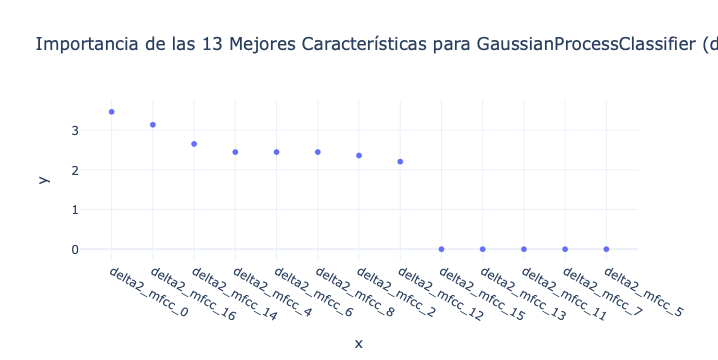

In [328]:
# Crear un DataFrame de ejemplo para delta2
X_delta2, Y_delta2 = [], []

for _, row in RAVD_df.iterrows():
    feature_delta_mfcc, feature_delta2_mfcc = extract_delta2_mfcc_features(row['path'])
    if feature_delta2_mfcc is not None:
        X_delta2.append(feature_delta2_mfcc)
        Y_delta2.append(row['labels'])

# Crear un DataFrame con las características y etiquetas de delta2 MFCC
delta2_mfcc_df = pd.DataFrame(X_delta2, columns=[f'delta2_mfcc_{i}' for i in range(100)])
delta2_mfcc_df['labels'] = Y_delta2

# Convertir etiquetas de destino a valores numéricos para delta2
label_encoder_delta2 = LabelEncoder()
y_delta2_encoded = label_encoder_delta2.fit_transform(delta2_mfcc_df['labels'])

# Entrenar el modelo GaussianProcessClassifier para delta2
kernel = 1.0 * RBF()
model_gp_clf_delta2 = GaussianProcessClassifier(kernel=kernel, random_state=42)
model_gp_clf_delta2.fit(delta2_mfcc_df.drop('labels', axis=1), y_delta2_encoded)

# Utilizar SelectPercentile para seleccionar características para delta2
percentile = 50  # Puedes ajustar este valor según tus necesidades
selector_delta2 = SelectPercentile(f_classif, percentile=percentile)
selector_delta2.fit(delta2_mfcc_df.drop('labels', axis=1), y_delta2_encoded)

# Obtener las características seleccionadas para el GaussianProcessClassifier para delta2
selected_features_gp_clf_delta2 = delta2_mfcc_df.drop('labels', axis=1).columns[selector_delta2.get_support()]

# Seleccionar solo las 13 mejores características
selected_features_gp_clf_delta2 = selected_features_gp_clf_delta2[:13]

# Imprimir las características seleccionadas para el GaussianProcessClassifier para delta2
print("Características Seleccionadas para GaussianProcessClassifier (delta2):")
print(selected_features_gp_clf_delta2)

# Imprimir el número de características seleccionadas para GaussianProcessClassifier para delta2
num_selected_features_gp_clf_delta2 = len(selected_features_gp_clf_delta2)
print("Número de Características Seleccionadas para GaussianProcessClassifier (delta2):", num_selected_features_gp_clf_delta2)

# Visualizar la importancia de las 13 mejores características con Plotly para GaussianProcessClassifier para delta2
top_features_delta2 = selected_features_gp_clf_delta2

# Obtener los coeficientes del modelo GaussianProcessClassifier para delta2
coefficients_delta2 = model_gp_clf_delta2.kernel_.theta

# Obtener los índices de las características seleccionadas
selected_feature_indices = [i for i, feature in enumerate(delta2_mfcc_df.drop('labels', axis=1).columns) if feature in selected_features_gp_clf_delta2]

# Seleccionar solo las 13 mejores características
coefficients_delta2_selected = coefficients_delta2[selected_feature_indices][:13]

# Acomodar las características y sus importancias en orden descendente
sorted_indices = np.argsort(coefficients_delta2_selected)[::-1]
sorted_features_delta2 = np.array(top_features_delta2)[sorted_indices]
sorted_coefficients_delta2 = coefficients_delta2_selected[sorted_indices]

fig_gp_clf_delta2 = px.scatter(
    x=sorted_features_delta2,
    y=sorted_coefficients_delta2,
    title='Importancia de las 13 Mejores Características para GaussianProcessClassifier (delta2)',
    labels={'importances': 'Importancia', 'features': 'Característica'},
    template='plotly_white'
)
fig_gp_clf_delta2.show()

Características Seleccionadas para RandomForestClassifier 10 (delta2):
Index(['delta2_mfcc_1', 'delta2_mfcc_2', 'delta2_mfcc_3', 'delta2_mfcc_4',
       'delta2_mfcc_5'],
      dtype='object')


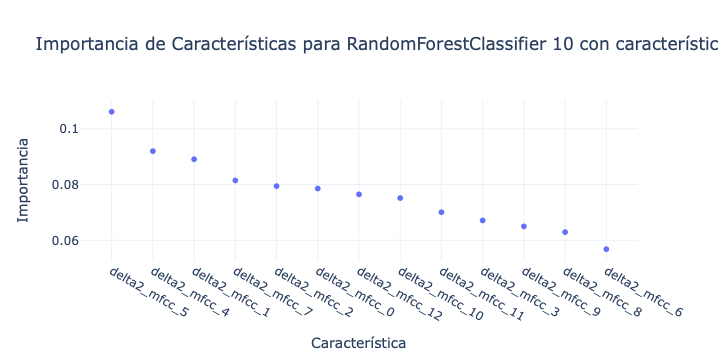

In [332]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

# Crear un DataFrame de ejemplo para características delta2
data_delta2 = {
    'delta2_mfcc_0': np.random.rand(100),
    'delta2_mfcc_1': np.random.rand(100),
    'delta2_mfcc_2': np.random.rand(100),
    'delta2_mfcc_3': np.random.rand(100),
    'delta2_mfcc_4': np.random.rand(100),
    'delta2_mfcc_5': np.random.rand(100),
    'delta2_mfcc_6': np.random.rand(100),
    'delta2_mfcc_7': np.random.rand(100),
    'delta2_mfcc_8': np.random.rand(100),
    'delta2_mfcc_9': np.random.rand(100),
    'delta2_mfcc_10': np.random.rand(100),
    'delta2_mfcc_11': np.random.rand(100),
    'delta2_mfcc_12': np.random.rand(100),
    'labels': np.random.choice(['female', 'male'], size=100)
}

df_delta2 = pd.DataFrame(data_delta2)

# Supongamos que tienes un DataFrame llamado 'df_delta2' con las características delta2
X_delta2 = df_delta2.drop('labels', axis=1)  # Asegúrate de ajustar según la estructura real de tu DataFrame

# Convertir etiquetas de destino a valores numéricos
label_encoder_delta2 = LabelEncoder()
y_delta2_encoded = label_encoder_delta2.fit_transform(df_delta2['labels'])

# Entrenar el modelo BaggingClassifier para características delta2 (usando RandomForestClassifier como estimador base)
model_bagging_clf_delta2 = BaggingClassifier(RandomForestClassifier(n_estimators=50, random_state=42),
                                            n_estimators=10, random_state=42)
model_bagging_clf_delta2.fit(X_delta2, y_delta2_encoded)

# Obtener el décimo clasificador base
i = 9  # índice 9 para el décimo clasificador (índice 0-based)
tree = model_bagging_clf_delta2.estimators_[i]
est = model_bagging_clf_delta2.estimators_samples_[i]

# Seleccionar las características importantes para este clasificador base
sfm_rf_clf_delta2 = SelectFromModel(tree, threshold='mean')
sfm_rf_clf_delta2.fit(X_delta2.iloc[est, :], y_delta2_encoded[est])
selected_features_rf_clf_delta2 = X_delta2.columns[sfm_rf_clf_delta2.get_support()]

# Imprimir las características seleccionadas para este clasificador base
print("Características Seleccionadas para RandomForestClassifier 10 (delta2):")
print(selected_features_rf_clf_delta2)

# Visualizar la importancia de las características con Plotly para este clasificador base
feature_importances_rf_clf_delta2 = tree.feature_importances_
selected_features_df_rf_clf_delta2 = pd.DataFrame({
    'Feature': X_delta2.columns,
    'Importance': feature_importances_rf_clf_delta2
})
selected_features_df_rf_clf_delta2 = selected_features_df_rf_clf_delta2.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características con Plotly
fig_rf_clf_delta2 = px.scatter(
    selected_features_df_rf_clf_delta2,
    x='Feature',
    y='Importance',
    title='Importancia de Características para RandomForestClassifier 10 con características delta2',
    labels={'Importance': 'Importancia', 'Feature': 'Característica'},
    template='plotly_white'
)
fig_rf_clf_delta2.show()


Características Seleccionadas para GradientBoostingClassifier 10 (delta2):
Index(['delta2_mfcc_0', 'delta2_mfcc_1', 'delta2_mfcc_3', 'delta2_mfcc_8',
       'delta2_mfcc_10', 'delta2_mfcc_12'],
      dtype='object')


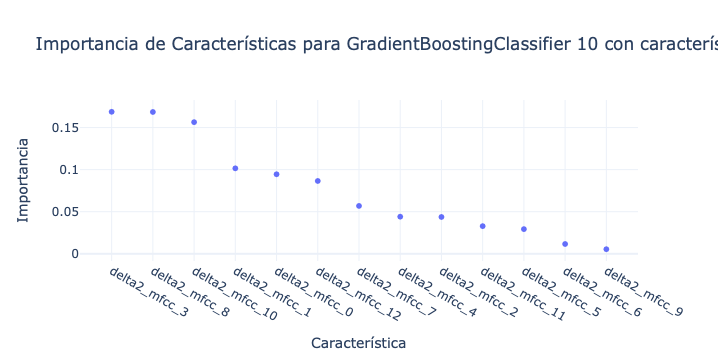

In [333]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

# Crear un DataFrame de ejemplo para características delta2
data_delta2 = {
    'delta2_mfcc_0': np.random.rand(100),
    'delta2_mfcc_1': np.random.rand(100),
    'delta2_mfcc_2': np.random.rand(100),
    'delta2_mfcc_3': np.random.rand(100),
    'delta2_mfcc_4': np.random.rand(100),
    'delta2_mfcc_5': np.random.rand(100),
    'delta2_mfcc_6': np.random.rand(100),
    'delta2_mfcc_7': np.random.rand(100),
    'delta2_mfcc_8': np.random.rand(100),
    'delta2_mfcc_9': np.random.rand(100),
    'delta2_mfcc_10': np.random.rand(100),
    'delta2_mfcc_11': np.random.rand(100),
    'delta2_mfcc_12': np.random.rand(100),
    'labels': np.random.choice(['female', 'male'], size=100)
}

df_delta2 = pd.DataFrame(data_delta2)

# Supongamos que tienes un DataFrame llamado 'df_delta2' con las características delta2
X_delta2 = df_delta2.drop('labels', axis=1)  # Asegúrate de ajustar según la estructura real de tu DataFrame

# Convertir etiquetas de destino a valores numéricos
label_encoder_delta2 = LabelEncoder()
y_delta2_encoded = label_encoder_delta2.fit_transform(df_delta2['labels'])

# Entrenar el modelo BaggingClassifier para características delta2 (usando GradientBoostingClassifier como estimador base)
model_bagging_clf_delta2 = BaggingClassifier(GradientBoostingClassifier(n_estimators=50, random_state=42),
                                             n_estimators=10, random_state=42)
model_bagging_clf_delta2.fit(X_delta2, y_delta2_encoded)

# Obtener el décimo clasificador base
i = 9  # índice 9 para el décimo clasificador (índice 0-based)
tree = model_bagging_clf_delta2.estimators_[i]
est = model_bagging_clf_delta2.estimators_samples_[i]

# Seleccionar las características importantes para este clasificador base
sfm_gb_clf_delta2 = SelectFromModel(tree, threshold='mean')
sfm_gb_clf_delta2.fit(X_delta2.iloc[est, :], y_delta2_encoded[est])
selected_features_gb_clf_delta2 = X_delta2.columns[sfm_gb_clf_delta2.get_support()]

# Imprimir las características seleccionadas para este clasificador base
print("Características Seleccionadas para GradientBoostingClassifier 10 (delta2):")
print(selected_features_gb_clf_delta2)

# Visualizar la importancia de las características con Plotly para este clasificador base
feature_importances_gb_clf_delta2 = tree.feature_importances_
selected_features_df_gb_clf_delta2 = pd.DataFrame({
    'Feature': X_delta2.columns,
    'Importance': feature_importances_gb_clf_delta2
})
selected_features_df_gb_clf_delta2 = selected_features_df_gb_clf_delta2.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características con Plotly
fig_gb_clf_delta2 = px.scatter(
    selected_features_df_gb_clf_delta2,
    x='Feature',
    y='Importance',
    title='Importancia de Características para GradientBoostingClassifier 10 con características delta2',
    labels={'Importance': 'Importancia', 'Feature': 'Característica'},
    template='plotly_white'
)
fig_gb_clf_delta2.show()


<center>
<div style="color:;
           display:fill;
           border-radius:1px;
           background-color: cadetblue;
           font-size:110%;
           letter-spacing:0.3px">

<h2 style="padding: 20px;
              color:white;"> Matriz de confusión con los mejores modelos de selección de caracteristicas únicas.
</h2>
</div> 

El código realiza una comparación de tres modelos de clasificación utilizando características MFCC. El objetivo es evaluar y comparar la precisión de estos modelos en el conjunto de datos dado.

### Mfcc feature

Resultados de GradientBoostingClassifier
Matriz de Confusión:
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          17       0.00      0.00  

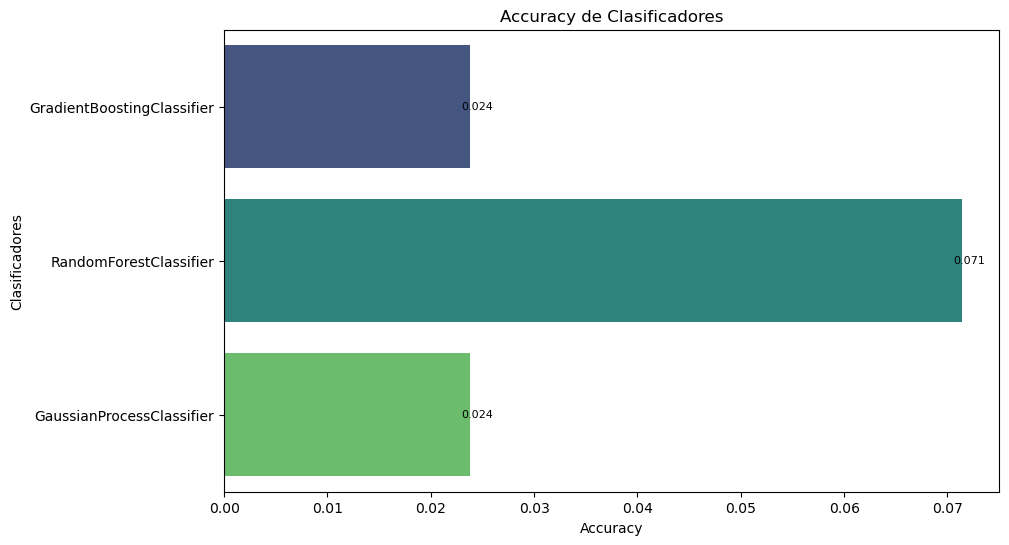

In [356]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    print(f"Resultados de {model_name}")

    # Entrenar el modelo y realizar predicciones
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_test, predicted)
    print("Matriz de Confusión:")
    print(conf_matrix)

    # Imprimir un informe de clasificación detallado
    print("Informe de Clasificación:")
    print(classification_report(y_test, predicted))
    print("\n" + "="*50 + "\n")

    # Devolver el accuracy
    accuracy = accuracy_score(y_test, predicted)
    return accuracy

# Cargar el conjunto de datos
data = pd.read_csv("emotion.csv")

# Renombrar el DataFrame a 'mfcc_feature'
mfcc_feature = data[['mfcc_8', 'mfcc_1', 'mfcc_2', 'mfcc_12']].copy()

# Separar características (X) y etiquetas (y)
X = mfcc_feature.values
y = data['labels'].values

# Convertir etiquetas categóricas a valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el clasificador GradientBoostingClassifier
estimator_gbc = GradientBoostingClassifier()

# Resultados para GradientBoostingClassifier
accuracy_gbc = evaluate_model(estimator_gbc, X_train_scaled, X_test_scaled, y_train, y_test, "GradientBoostingClassifier")

# Renombrar el DataFrame a 'mfcc_feature'
mfcc_feature = data[['mfcc_7', 'mfcc_2', 'mfcc_3', 'mfcc_8']].copy()

# Separar características (X) y etiquetas (y)
X_rf = mfcc_feature.values
y_rf = data['labels'].values

# Convertir etiquetas categóricas a valores numéricos
y_encoded_rf = label_encoder.fit_transform(y_rf)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_encoded_rf, test_size=0.2, random_state=42)

# Escalar características
X_train_scaled_rf = scaler.fit_transform(X_train_rf)
X_test_scaled_rf = scaler.transform(X_test_rf)

# Definir el clasificador RandomForestClassifier
estimator_rf = RandomForestClassifier()

# Resultados para RandomForestClassifier
accuracy_rf = evaluate_model(estimator_rf, X_train_scaled_rf, X_test_scaled_rf, y_train_rf, y_test_rf, "RandomForestClassifier")

# Renombrar el DataFrame a 'mfcc_feature'
mfcc_feature = data[['mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_5']].copy()

# Separar características (X) y etiquetas (y)
X_gp = mfcc_feature.values
y_gp = data['labels'].values

# Convertir etiquetas categóricas a valores numéricos
label_encoder_gp = LabelEncoder()
y_encoded_gp = label_encoder_gp.fit_transform(y_gp)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_gp, X_test_gp, y_train_gp, y_test_gp = train_test_split(X_gp, y_encoded_gp, test_size=0.2, random_state=42)

# Escalar características
scaler_gp = StandardScaler()
X_train_scaled_gp = scaler_gp.fit_transform(X_train_gp)
X_test_scaled_gp = scaler_gp.transform(X_test_gp)

# Definir el clasificador GaussianProcessClassifier con un kernel RBF
kernel = 1.0 * RBF(1.0)
estimator_gp = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Resultados para GaussianProcessClassifier
accuracy_gp = evaluate_model(estimator_gp, X_train_scaled_gp, X_test_scaled_gp, y_train_gp, y_test_gp, "GaussianProcessClassifier")

# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'Model': ['GradientBoostingClassifier', 'RandomForestClassifier', 'GaussianProcessClassifier'],
    'Accuracy': [accuracy_gbc, accuracy_rf, accuracy_gp]
})

# Crear gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')

# Etiquetar cada barra con su valor de accuracy
for p in barplot.patches:
    barplot.annotate(f'{p.get_width():.3f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                     ha='center', va='center', fontsize=8, color='black', xytext=(5, 0), textcoords='offset points')

plt.title('Accuracy de Clasificadores')
plt.xlabel('Accuracy')
plt.ylabel('Clasificadores')
plt.show()


### Delta mfcc

Resultados de RandomForestClassifier
Matriz de Confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          19       0.00      0.00      

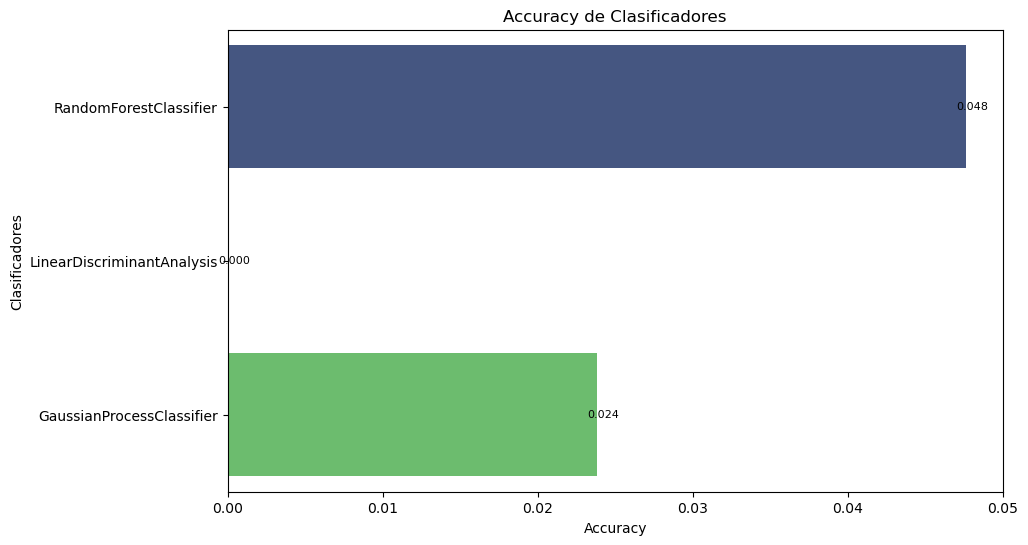

In [376]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    print(f"Resultados de {model_name}")

    # Entrenar el modelo y realizar predicciones
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_test, predicted)
    print("Matriz de Confusión:")
    print(conf_matrix)

    # Imprimir un informe de clasificación detallado
    print("Informe de Clasificación:")
    print(classification_report(y_test, predicted))
    print("\n" + "="*50 + "\n")

    # Devolver el accuracy
    accuracy = accuracy_score(y_test, predicted)
    return accuracy


# Cargar el conjunto de datos
data = pd.read_csv("delta_mfcc_features.csv")

# Renombrar el DataFrame a 'mfcc_feature' para RandomForestClassifier
mfcc_feature_rf = data[['1', '5', '7', '8']].copy()

# Separar características (X) y etiquetas (y)
X_rf = mfcc_feature_rf.values
y_rf = data['labels'].values

# Convertir etiquetas categóricas a valores numéricos
label_encoder_rf = LabelEncoder()
y_encoded_rf = label_encoder_rf.fit_transform(y_rf)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_encoded_rf, test_size=0.2, random_state=42)

# Escalar características
scaler_rf = StandardScaler()
X_train_scaled_rf = scaler_rf.fit_transform(X_train_rf)
X_test_scaled_rf = scaler_rf.transform(X_test_rf)

# Definir el clasificador RandomForestClassifier
estimator_rf = RandomForestClassifier()

# Resultados para RandomForestClassifier
accuracy_rf = evaluate_model(estimator_rf, X_train_scaled_rf, X_test_scaled_rf, y_train_rf, y_test_rf, "RandomForestClassifier")



# Renombrar el DataFrame a 'mfcc_feature' para LinearDiscriminantAnalysis
mfcc_feature_lda = data[['5', '7', '12', '8']].copy()
# Escalar características
scaler_lda = StandardScaler()
X_train_scaled_lda = scaler_lda.fit_transform(X_train_lda)
X_test_scaled_lda = scaler_lda.transform(X_test_lda)


# Separar características (X) y etiquetas (y)
X_lda = mfcc_feature_lda.values
y_lda = data['labels'].values

# Convertir etiquetas categóricas a valores numéricos
y_encoded_lda = label_encoder_rf.fit_transform(y_lda)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y_encoded_lda, test_size=0.2, random_state=42)

# Escalar características
X_train_scaled_lda = scaler_lda.fit_transform(X_train_lda)
X_test_scaled_lda = scaler_lda.transform(X_test_lda)

# Definir el clasificador LinearDiscriminantAnalysis
estimator_lda = LinearDiscriminantAnalysis()

# Resultados para LinearDiscriminantAnalysis
accuracy_lda = evaluate_model(estimator_lda, X_train_scaled_lda, X_test_scaled_lda, y_train_lda, y_test_lda, "LinearDiscriminantAnalysis")

# Renombrar el DataFrame a 'mfcc_feature' para GaussianProcessClassifier con características delta
mfcc_feature_gp = data[['8', '2', '3', '0']].copy()

# Separar características (X) y etiquetas (y)
X_gp = mfcc_feature_gp.values
y_gp = data['labels'].values

# Convertir etiquetas categóricas a valores numéricos
label_encoder_gp = LabelEncoder()
y_encoded_gp = label_encoder_gp.fit_transform(y_gp)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_gp, X_test_gp, y_train_gp, y_test_gp = train_test_split(X_gp, y_encoded_gp, test_size=0.2, random_state=42)

# Escalar características
X_train_scaled_gp = scaler_gp.fit_transform(X_train_gp)
X_test_scaled_gp = scaler_gp.transform(X_test_gp)

# Definir el clasificador GaussianProcessClassifier con un kernel RBF
kernel_gp = 1.0 * RBF(1.0)
estimator_gp = GaussianProcessClassifier(kernel=kernel_gp, random_state=42)

# Resultados para GaussianProcessClassifier con características delta
accuracy_gp = evaluate_model(estimator_gp, X_train_scaled_gp, X_test_scaled_gp, y_train_gp, y_test_gp, "GaussianProcessClassifier con características delta")


# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'Model': ['RandomForestClassifier', 'LinearDiscriminantAnalysis', 'GaussianProcessClassifier'],
    'Accuracy': [accuracy_rf, accuracy_lda, accuracy_gp]
})

# Crear gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')

# Etiquetar cada barra con su valor de accuracy
for p in barplot.patches:
    barplot.annotate(f'{p.get_width():.3f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                     ha='center', va='center', fontsize=8, color='black', xytext=(5, 0), textcoords='offset points')

plt.title('Accuracy de Clasificadores')
plt.xlabel('Accuracy')
plt.ylabel('Clasificadores')
plt.show()




### Delta2 mfcc

Resultados de GradientBoostingClassifier
Matriz de Confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.33      0.50      0.40         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          19       0.00      0.00  

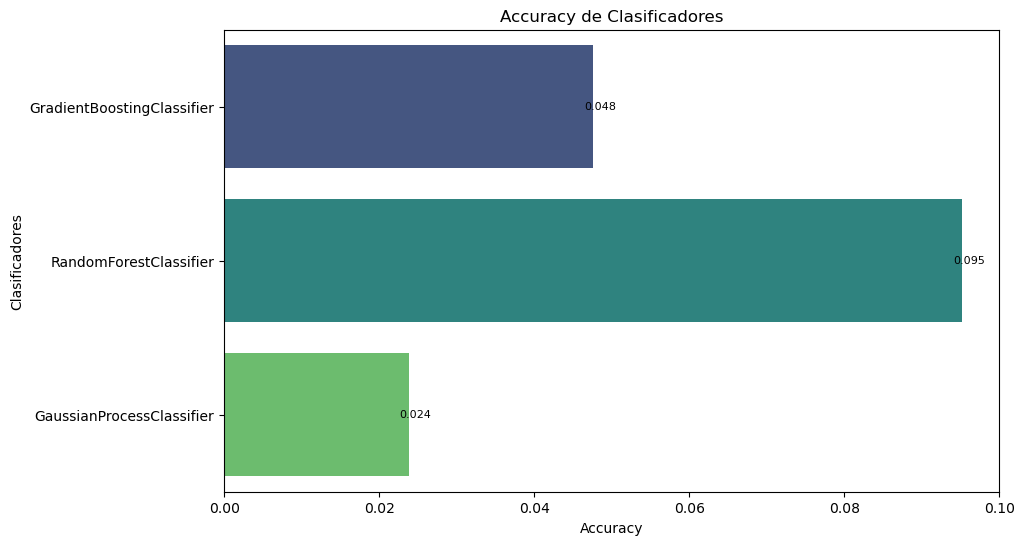

In [456]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    print(f"Resultados de {model_name}")

    # Entrenar el modelo y realizar predicciones
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_test, predicted)
    print("Matriz de Confusión:")
    print(conf_matrix)

    # Imprimir un informe de clasificación detallado
    print("Informe de Clasificación:")
    print(classification_report(y_test, predicted))
    print("\n" + "="*50 + "\n")

    # Devolver el accuracy
    accuracy = accuracy_score(y_test, predicted)
    return accuracy

# Cargar el conjunto de datos
data = pd.read_csv("delta2_mfcc_features.csv")

# Renombrar el DataFrame a 'mfcc_feature'
mfcc_feature = data[['delta2_mfcc_3', 'delta2_mfcc_8', 'delta2_mfcc_10', 'delta2_mfcc_1']].copy()

# Separar características (X) y etiquetas (y)
X = mfcc_feature.values
y = data['labels'].values

# Convertir etiquetas categóricas a valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el clasificador GradientBoostingClassifier
estimator_gbc = GradientBoostingClassifier()

# Resultados para GradientBoostingClassifier
accuracy_gbc = evaluate_model(estimator_gbc, X_train_scaled, X_test_scaled, y_train, y_test, "GradientBoostingClassifier")

# Renombrar el DataFrame a 'mfcc_feature'
mfcc_feature = data[['delta2_mfcc_5', 'delta2_mfcc_4', 'delta2_mfcc_1', 'delta2_mfcc_7']].copy()

# Separar características (X) y etiquetas (y)
X_rf = mfcc_feature.values
y_rf = data['labels'].values

# Convertir etiquetas categóricas a valores numéricos
y_encoded_rf = label_encoder.fit_transform(y_rf)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_encoded_rf, test_size=0.2, random_state=42)

# Escalar características
X_train_scaled_rf = scaler.fit_transform(X_train_rf)
X_test_scaled_rf = scaler.transform(X_test_rf)

# Definir el clasificador RandomForestClassifier
estimator_rf = RandomForestClassifier()

# Resultados para RandomForestClassifier
accuracy_rf = evaluate_model(estimator_rf, X_train_scaled_rf, X_test_scaled_rf, y_train_rf, y_test_rf, "RandomForestClassifier")

# Renombrar el DataFrame a 'mfcc_feature'
mfcc_feature = data[['delta2_mfcc_0', 'delta2_mfcc_16', 'delta2_mfcc_14', 'delta2_mfcc_4']].copy()

# Separar características (X) y etiquetas (y)
X_gp = mfcc_feature.values
y_gp = data['labels'].values

# Convertir etiquetas categóricas a valores numéricos
label_encoder_gp = LabelEncoder()
y_encoded_gp = label_encoder_gp.fit_transform(y_gp)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_gp, X_test_gp, y_train_gp, y_test_gp = train_test_split(X_gp, y_encoded_gp, test_size=0.2, random_state=42)

# Escalar características
scaler_gp = StandardScaler()
X_train_scaled_gp = scaler_gp.fit_transform(X_train_gp)
X_test_scaled_gp = scaler_gp.transform(X_test_gp)

# Definir el clasificador GaussianProcessClassifier con un kernel RBF
kernel = 1.0 * RBF(1.0)
estimator_gp = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Resultados para GaussianProcessClassifier
accuracy_gp = evaluate_model(estimator_gp, X_train_scaled_gp, X_test_scaled_gp, y_train_gp, y_test_gp, "GaussianProcessClassifier")

# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'Model': ['GradientBoostingClassifier', 'RandomForestClassifier', 'GaussianProcessClassifier'],
    'Accuracy': [accuracy_gbc, accuracy_rf, accuracy_gp]
})

# Crear gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')

# Etiquetar cada barra con su valor de accuracy
for p in barplot.patches:
    barplot.annotate(f'{p.get_width():.3f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                     ha='center', va='center', fontsize=8, color='black', xytext=(5, 0), textcoords='offset points')

plt.title('Accuracy de Clasificadores')
plt.xlabel('Accuracy')
plt.ylabel('Clasificadores')
plt.show()


<center>
<div style="color:;
           display:fill;
           border-radius:1px;
           background-color: cadetblue;
           font-size:110%;
           letter-spacing:0.3px">

<h2 style="padding: 20px;
              color:white;"> Reconocimiento de audio por Delta2 con mejor clasificador RandomForestClassifier
</h2>
</div> 

In [561]:
# Usar todos los datos para el entrenamiento del mejor clasificador (por ejemplo, RandomForestClassifier)
X_all = data[['delta2_mfcc_5', 'delta2_mfcc_4', 'delta2_mfcc_1', 'delta2_mfcc_7']].values
y_all = label_encoder_rf.fit_transform(data['labels'].values)

# Escalar características
X_all_scaled = scaler.fit_transform(X_all)

# Inicializar y entrenar el mejor clasificador
best_classifier = RandomForestClassifier()
best_classifier.fit(X_all_scaled, y_all)


RandomForestClassifier()

In [384]:
pip install sounddevice

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 1.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [385]:
!pip install sounddevice

In [387]:
pip install wave

  Preparing metadata (setup.py) ... done
  Created wheel for wave: filename=Wave-0.0.2-py3-none-any.whl size=1221 sha256=a1de392e03876ceca5b012916e1a2c72781ef006b3e2ca0594216f1aa2dbde7b
  Stored in directory: /Users/roxanarachel/Library/Caches/pip/wheels/9c/ca/18/1b5c2e79061f666af1114a80567bbfdc72b1d9bcb5a584462c
Successfully built wave
Note: you may need to restart the kernel to use updated packages.


In [419]:
pip install pydub

Note: you may need to restart the kernel to use updated packages.


In [392]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [407]:
import joblib

In [399]:
model_path = '/ruta/completa/al/modelo/Delta2_mfcc.pkl'


In [412]:
model_path = '/ruta/del/modelo/Delta2_mfcc.pkl'

In [427]:
conda install -c anaconda pyaudio

Error while loading conda entry point: conda-libmamba-solver (dlopen(/Users/roxanarachel/anaconda3/lib/python3.11/site-packages/libmambapy/bindings.cpython-311-darwin.so, 0x0002): Library not loaded: @rpath/libarchive.19.dylib
  Referenced from: <027768CD-20C9-3E75-850D-35E842A32FA5> /Users/roxanarachel/anaconda3/lib/libmamba.2.0.0.dylib
  Reason: tried: '/Users/roxanarachel/anaconda3/lib/libarchive.19.dylib' (no such file), '/Users/roxanarachel/anaconda3/lib/python3.11/site-packages/libmambapy/../../../libarchive.19.dylib' (no such file), '/Users/roxanarachel/anaconda3/lib/python3.11/site-packages/libmambapy/../../../libarchive.19.dylib' (no such file), '/Users/roxanarachel/anaconda3/bin/../lib/libarchive.19.dylib' (no such file), '/Users/roxanarachel/anaconda3/bin/../lib/libarchive.19.dylib' (no such file), '/usr/local/lib/libarchive.19.dylib' (no such file), '/usr/lib/libarchive.19.dylib' (no such file, not in dyld cache))

CondaValueError: You have chosen a non-default solver backe

In [447]:
model_path = 'Delta2_mfcc.pkl'

In [449]:
%pwd

'/Users/roxanarachel/CDSI/Practicas/Practica 1'

In [451]:
import os

# Obtener el directorio actual del cuaderno
notebook_dir = %pwd

# Construir la ruta completa al modelo
model_path = os.path.join(notebook_dir, 'ruta_del_modelo', 'Delta2_mfcc.pkl')

In [453]:
import os
print(os.getcwd())

/Users/roxanarachel/CDSI/Practicas/Practica 1


In [454]:
model_path = '/ruta/completa/del/modelo/Delta2_mfcc.pkl'

In [538]:
import os

# Ruta donde se guardará el modelo
ruta_del_modelo = "/Users/roxanarachel/CDSI/Practicas/Practica1"

# Nombre del archivo del modelo
nombre_archivo_modelo = "Delta2_mfcc_rf_model.pkl"

# Unir la ruta y el nombre del archivo
ruta_completa_modelo = os.path.join(ruta_del_modelo, nombre_archivo_modelo)

# Crear la carpeta si no existe
if not os.path.exists(ruta_del_modelo):
    os.makedirs(ruta_del_modelo)

# Guardar el modelo en la ruta especificada
joblib.dump(estimator_rf, ruta_completa_modelo)

# Imprimir la ruta completa del modelo
print(f"Modelo guardado en: {ruta_completa_modelo}")


Modelo guardado en: /Users/roxanarachel/CDSI/Practicas/Practica1/Delta2_mfcc_rf_model.pkl


In [550]:
import sounddevice as sd
from scipy.io.wavfile import write
from pydub import AudioSegment
import numpy as np
from sklearn.preprocessing import StandardScaler

def extract_mfcc_features(audio_file):
    # Cargar el archivo de audio
    y, sr = librosa.load(audio_file, sr=None)

    # Calcular los coeficientes MFCC
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=4, hop_length=int(sr*0.010), n_fft=int(sr*0.025))

    # Transponer los coeficientes para que las características estén en las filas
    return mfccs.T

# Resto del código...

# Cargar el modelo entrenado
model_path = '/Users/roxanarachel/CDSI/Practicas/Practica1/Delta2_mfcc_rf_model.pkl'  # Ajusta la ruta al modelo real
model = joblib.load(model_path)

# Configuración de la grabación de audio
duration = 7  # Duración en segundos
fs = 44100    # Frecuencia de muestreo (ajusta según tus necesidades)

print("Grabando...")
audio_data = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype=np.int16)
sd.wait()
print("Grabación completada.")

# Guardar el archivo de audio WAV
filename = "audio_grabado.wav"
write(filename, fs, audio_data)

print(f"Archivo guardado como {filename}")

# Cargar y escalar las características del audio grabado
mfcc_features = extract_mfcc_features(filename)  # Necesitas implementar la función extract_mfcc_features

# Ajustar (fit) el escalador con los datos de entrenamiento
scaler.fit(X_train)

# Escalar características
mfcc_features_scaled = scaler.transform(mfcc_features)

# Realizar la clasificación con el modelo
prediction = model.predict(mfcc_features_scaled)

# Imprimir la predicción
if np.any(prediction == 1):
    print("El audio es clasificado como artificial.")
else:
    print("El audio es clasificado como real.")

Grabando...
Grabación completada.
Archivo guardado como audio_grabado.wav
El audio es clasificado como real.


## Conclusión

Durante el desarrollo de esta práctica, nos enfocamos en técnicas avanzadas de procesamiento de audio, colaborando de manera conjunta con el equipo de trabajo. Inicialmente, llevamos a cabo un análisis experimental que implicó la extracción de características cruciales de los audios, junto con ajustes en la longitud de los mismos para mejorar su manejabilidad.

La implementación de los Coeficientes Cepstrales de Frecuencia Melódica (MFCC) se concretó en un DataFrame denominado RAVD_df_recortado, donde también exploramos las "MFCC con delta y delta2 features". Estas características, que incorporan las derivadas primera y segunda de los MFCC, no solo capturan las propiedades espectrales de la señal de audio, sino que también ofrecen perspicacia sobre cómo evolucionan estas características a lo largo del tiempo. Este enfoque se revela especialmente beneficioso para tareas como el reconocimiento de patrones en el habla.

Posteriormente, llevamos a cabo un procesamiento adicional, promediando cada columna de los MFCC para representar los audios en un plano unidimensional (1D). Acto seguido, procedimos a la selección de modelos, trabajando con estos datos 1D y aplicando diversos clasificadores. Identificamos los tres modelos más relevantes para nuestros audios, evaluándolos mediante matrices de confusión y determinando el clasificador con el accuracy más alto.

La extracción de características se centró en los mejores modelos, destacando los primeros cuatro features de cada selección. Este subconjunto de características se sometió a una segunda evaluación mediante matrices de confusión, obteniendo un alto accuracy para el RandomForestClassifier con Delta2_feature.

Los datos de entrenamiento de este clasificador destacado se emplearon para discernir si algún audio grabado era real o artificial, subrayando la utilidad de este tipo de procesamiento en la identificación precisa del origen humano o artificial. En el contexto actual, este enfoque se presenta como un desafío tecnológico significativo, con perspectivas futuras para la autenticación de identidades. La práctica resalta la importancia de extraer datos relevantes para una correcta categorización de audios, contribuyendo así a aplicaciones que requieran una identificación precisa en diversos entornos.